# Index

- 문제정의
- 데이터:
    - 불러오기
    - 이해하기
- 데이터 전처리:
    - 로우(row)
    - 칼럼(column)
- 모델 셀렉션
- 의문점
- 데이터 저장 및 불러오기

### 0. 문제정의
- '롤'이란:
    - 특정한 전장에서 하나의 캐릭터를 육성해 팀원들과 함께 적팀을 제압하는 게임 (최종적으로 본진 부시거나 상대팀이 4명 이상 항복하면 이길 수 있다))
    - 플레이어들은 게임에 앞서 자신이 조종할 챔피언(캐릭터)을 선택합니다.
    - 게임이 시작되면 자신이 선택한 챔피언으로 승리를 위해 적 플레이어들의 챔피언들과 맞서 싸워나갑니다.
    - 롤은 일반적으로 ‘소환사의 협곡’이라는 맵에서 5:5 경기가 진행됩니다.

- 자신의 게임 실력에 비례한 랭크가 부여된다 브론즈 실버 골드 다이아 마스터 그랜드마스터 챌린저        
- 게임의 실력은 손가락 끝의 반응 속도와 게임 흐름에 대한 이해도에 비례한다고 생각한다
- 우리는 손가락이 굳었기 때문에 후자로 통해 롤에서 등급을 올리고 싶다


### 1. 데이터 불러오기

In [129]:
df_ = pd.read_csv("Challenger_Ranked_Games.csv")

### 2. 데이터 이해하기 
- 데이터 개수 : 26848
- 데이터 컬럼 개수 및 의미 파악 : 
    - 50가지
    - 게임시간
    - __Win : 어느팀이 승리 했고
    - __First__ : 객체마다 어느 팀이 먼저 처치해서 보너스 가져가고
    - __obj_Total__ : 게임 동안 올린 레벨/골드 누적수 
        - __obj_Kill : 혹은, 오브젝트마다 각 팀의 처치 누적수

In [130]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [131]:
# 깊은복사
df = df_.copy()
df

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0      4247263043         1323         0               1               0   
1      4247155821         1317         1               0               0   
2      4243963257          932         0               0               0   
3      4241678498         2098         0               0               0   
4      4241538868         2344         1               1               1   
...           ...          ...       ...             ...             ...   
26899  4143231833         1468         0               1               0   
26900  4157911901          970         0               1               1   
26901  3764171638         1480         0               1               1   
26902  4110201724         1837         1               1               0   
26903  4100240254          948         1               1               1   

       blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0                   0                0                   0                0   
1                   0                1                   0                2   
2                   0                0                   0                0   
3                   1                1                   0                1   
4                   1                1                   1                2   
...               ...              ...                 ...              ...   
26899               0                0                   0                1   
26900               0                1                   0                3   
26901               0                1                   0                1   
26902               0                1                   0                3   
26903               0                0                   0                1   

       blueBaronKills  ...  redAssist  redChampionDamageDealt  redTotalGold  \
0                   0  ...         68                   73016         49832   
1                   0  ...          8                   44218         37136   
2                   0  ...         20                   30797         35364   
3                   1  ...         72                  125866         70528   
4                   2  ...         83                  131536         74596   
...               ...  ...        ...                     ...           ...   
26899               0  ...         40                   75531         46558   
26900               0  ...         31                   99837         70177   
26901               0  ...         34                   55214         48849   
26902               0  ...         29                   88366         52625   
26903               0  ...          3                   16574         20972   

       redTotalMinionKills  redTotalLevel  redAvgLevel  redJungleMinionKills  \
0                      533             64         12.8                   138   
1                      571             59         11.8                   134   
2                      400             50         10.0                    89   
3                      832             84         16.8                   205   
4                      794             85         17.0                   227   
...                    ...            ...          ...                   ...   
26899                  478             64         12.8                   141   
26900                  455             72         14.4                   136   
26901                  636             66         13.2                   175   
26902                  660             70         14.0                   168   
26903                  351             40          8.0                    56   

       redKillingSpree  redTotalHeal  redObjectDamageDealt  
0                    8         38711                 60463  
1                    3         24829                 14105  
2                    5         12589                 452

# 3. 데이터 전처리

### 로우(Row)

In [132]:
df_r = df.copy()
df_r

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0      4247263043         1323         0               1               0   
1      4247155821         1317         1               0               0   
2      4243963257          932         0               0               0   
3      4241678498         2098         0               0               0   
4      4241538868         2344         1               1               1   
...           ...          ...       ...             ...             ...   
26899  4143231833         1468         0               1               0   
26900  4157911901          970         0               1               1   
26901  3764171638         1480         0               1               1   
26902  4110201724         1837         1               1               0   
26903  4100240254          948         1               1               1   

       blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0                   0                0                   0                0   
1                   0                1                   0                2   
2                   0                0                   0                0   
3                   1                1                   0                1   
4                   1                1                   1                2   
...               ...              ...                 ...              ...   
26899               0                0                   0                1   
26900               0                1                   0                3   
26901               0                1                   0                1   
26902               0                1                   0                3   
26903               0                0                   0                1   

       blueBaronKills  ...  redAssist  redChampionDamageDealt  redTotalGold  \
0                   0  ...         68                   73016         49832   
1                   0  ...          8                   44218         37136   
2                   0  ...         20                   30797         35364   
3                   1  ...         72                  125866         70528   
4                   2  ...         83                  131536         74596   
...               ...  ...        ...                     ...           ...   
26899               0  ...         40                   75531         46558   
26900               0  ...         31                   99837         70177   
26901               0  ...         34                   55214         48849   
26902               0  ...         29                   88366         52625   
26903               0  ...          3                   16574         20972   

       redTotalMinionKills  redTotalLevel  redAvgLevel  redJungleMinionKills  \
0                      533             64         12.8                   138   
1                      571             59         11.8                   134   
2                      400             50         10.0                    89   
3                      832             84         16.8                   205   
4                      794             85         17.0                   227   
...                    ...            ...          ...                   ...   
26899                  478             64         12.8                   141   
26900                  455             72         14.4                   136   
26901                  636             66         13.2                   175   
26902                  660             70         14.0                   168   
26903                  351             40          8.0                    56   

       redKillingSpree  redTotalHeal  redObjectDamageDealt  
0                    8         38711                 60463  
1                    3         24829                 14105  
2                    5         12589                 452

In [133]:
for x in df.columns:
    print(x, (df[x]==0).sum())

gameId 0
gameDuraton 0
blueWins 13450
blueFirstBlood 13357
blueFirstTower 12763
blueFirstBaron 20337
blueFirstDragon 15972
blueFirstInhibitor 17027
blueDragonKills 8530
blueBaronKills 19601
blueTowerKills 3832
blueInhibitorKills 16044
blueWardPlaced 1892
blueWardkills 2433
blueKills 137
blueDeath 144
blueAssist 229
blueChampionDamageDealt 1
blueTotalGold 0
blueTotalMinionKills 1
blueTotalLevel 0
blueAvgLevel 0
blueJungleMinionKills 1950
blueKillingSpree 1162
blueTotalHeal 2
blueObjectDamageDealt 225
redWins 13454
redFirstBlood 13601
redFirstTower 14455
redFirstBaron 19731
redFirstDragon 13357
redFirstInhibitor 17527
redDragonKills 7359
redBaronKills 18999
redTowerKills 4134
redInhibitorKills 16432
redWardPlaced 1905
redWardkills 2416
redKills 148
redDeath 128
redAssist 249
redChampionDamageDealt 1
redTotalGold 0
redTotalMinionKills 2
redTotalLevel 0
redAvgLevel 0
redJungleMinionKills 1963
redKillingSpree 1211
redTotalHeal 3
redObjectDamageDealt 240


In [134]:
import plotly.express as px
fig = px.histogram(df, x="blueJungleMinionKills")
fig.show()

fig.write_image('jungle_before.jpg')

In [135]:
# 첫 처치가 없는 게임은 정상적인 게임이라고 보기 어렵다
pd.crosstab(df_r["blueFirstBlood"], df_r["redFirstBlood"])

redFirstBlood       0      1
blueFirstBlood              
0                  54  13303
1               13547      0

In [136]:
# 팀간 킬이 0인 데이터도 정상적인 게임에서 벗어난다고 보기 쉽다
print((df_r['redKills'] == 0).sum())
print((df_r['blueKills'] == 0).sum())

148
137


In [137]:
print((df_r["blueJungleMinionKills"] == 0).sum())
print((df_r["redJungleMinionKills"] == 0).sum())

1950
1963


In [138]:
df_r = df_r[df_r['redKills'] != 0]

In [139]:
# 모두 제거해보자
# 퍼스트 블러드는 어차피 제거대상항목이라서 생략한다
df_r = df_r[df_r['blueKills'] != 0]
df_r = df_r[df_r["blueJungleMinionKills"] != 0]
df_r = df_r[df_r["redJungleMinionKills"] != 0]

In [140]:
import plotly.express as px
fig = px.histogram(df_r, x="blueJungleMinionKills")
fig.show()

fig.write_image('jungle_after.jpg')

In [141]:
for x in df_r.columns:
    print(x, (df_r[x]==0).sum())

gameId 0
gameDuraton 0
blueWins 12384
blueFirstBlood 12233
blueFirstTower 11588
blueFirstBaron 18133
blueFirstDragon 13794
blueFirstInhibitor 15814
blueDragonKills 6352
blueBaronKills 17397
blueTowerKills 3337
blueInhibitorKills 15134
blueWardPlaced 2
blueWardkills 317
blueKills 0
blueDeath 0
blueAssist 64
blueChampionDamageDealt 0
blueTotalGold 0
blueTotalMinionKills 0
blueTotalLevel 0
blueAvgLevel 0
blueJungleMinionKills 0
blueKillingSpree 919
blueTotalHeal 0
blueObjectDamageDealt 51
redWins 12316
redFirstBlood 12467
redFirstTower 13206
redFirstBaron 17529
redFirstDragon 11178
redFirstInhibitor 16234
redDragonKills 5181
redBaronKills 16797
redTowerKills 3607
redInhibitorKills 15446
redWardPlaced 4
redWardkills 311
redKills 0
redDeath 0
redAssist 70
redChampionDamageDealt 0
redTotalGold 0
redTotalMinionKills 0
redTotalLevel 0
redAvgLevel 0
redJungleMinionKills 0
redKillingSpree 958
redTotalHeal 0
redObjectDamageDealt 52


In [142]:
# 히스토그램이 많이 양호해졌다
fig = px.histogram(df_r, x="redAvgLevel")
fig.show()

fig = px.histogram(df_r, x="blueAvgLevel")
fig.show()

In [143]:
fig = px.histogram(df_r, x="blueWardPlaced")
fig.show()
print(df_r.blueWardPlaced.value_counts())

54     399
59     394
65     367
62     367
48     364
      ... 
175      1
183      1
230      1
180      1
191      1
Name: blueWardPlaced, Length: 192, dtype: int64


In [144]:
df_r

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0      4247263043         1323         0               1               0   
1      4247155821         1317         1               0               0   
2      4243963257          932         0               0               0   
3      4241678498         2098         0               0               0   
4      4241538868         2344         1               1               1   
...           ...          ...       ...             ...             ...   
26899  4143231833         1468         0               1               0   
26900  4157911901          970         0               1               1   
26901  3764171638         1480         0               1               1   
26902  4110201724         1837         1               1               0   
26903  4100240254          948         1               1               1   

       blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0                   0                0                   0                0   
1                   0                1                   0                2   
2                   0                0                   0                0   
3                   1                1                   0                1   
4                   1                1                   1                2   
...               ...              ...                 ...              ...   
26899               0                0                   0                1   
26900               0                1                   0                3   
26901               0                1                   0                1   
26902               0                1                   0                3   
26903               0                0                   0                1   

       blueBaronKills  ...  redAssist  redChampionDamageDealt  redTotalGold  \
0                   0  ...         68                   73016         49832   
1                   0  ...          8                   44218         37136   
2                   0  ...         20                   30797         35364   
3                   1  ...         72                  125866         70528   
4                   2  ...         83                  131536         74596   
...               ...  ...        ...                     ...           ...   
26899               0  ...         40                   75531         46558   
26900               0  ...         31                   99837         70177   
26901               0  ...         34                   55214         48849   
26902               0  ...         29                   88366         52625   
26903               0  ...          3                   16574         20972   

       redTotalMinionKills  redTotalLevel  redAvgLevel  redJungleMinionKills  \
0                      533             64         12.8                   138   
1                      571             59         11.8                   134   
2                      400             50         10.0                    89   
3                      832             84         16.8                   205   
4                      794             85         17.0                   227   
...                    ...            ...          ...                   ...   
26899                  478             64         12.8                   141   
26900                  455             72         14.4                   136   
26901                  636             66         13.2                   175   
26902                  660             70         14.0                   168   
26903                  351             40          8.0                    56   

       redKillingSpree  redTotalHeal  redObjectDamageDealt  
0                    8         38711                 60463  
1                    3         24829                 14105  
2                    5         12589                 452

### 칼럼(column)

In [145]:
# 깊은복사
df_c = df_r.copy()
df_c

gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0      4247263043         1323         0               1               0   
1      4247155821         1317         1               0               0   
2      4243963257          932         0               0               0   
3      4241678498         2098         0               0               0   
4      4241538868         2344         1               1               1   
...           ...          ...       ...             ...             ...   
26899  4143231833         1468         0               1               0   
26900  4157911901          970         0               1               1   
26901  3764171638         1480         0               1               1   
26902  4110201724         1837         1               1               0   
26903  4100240254          948         1               1               1   

       blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0                   0                0                   0                0   
1                   0                1                   0                2   
2                   0                0                   0                0   
3                   1                1                   0                1   
4                   1                1                   1                2   
...               ...              ...                 ...              ...   
26899               0                0                   0                1   
26900               0                1                   0                3   
26901               0                1                   0                1   
26902               0                1                   0                3   
26903               0                0                   0                1   

       blueBaronKills  ...  redAssist  redChampionDamageDealt  redTotalGold  \
0                   0  ...         68                   73016         49832   
1                   0  ...          8                   44218         37136   
2                   0  ...         20                   30797         35364   
3                   1  ...         72                  125866         70528   
4                   2  ...         83                  131536         74596   
...               ...  ...        ...                     ...           ...   
26899               0  ...         40                   75531         46558   
26900               0  ...         31                   99837         70177   
26901               0  ...         34                   55214         48849   
26902               0  ...         29                   88366         52625   
26903               0  ...          3                   16574         20972   

       redTotalMinionKills  redTotalLevel  redAvgLevel  redJungleMinionKills  \
0                      533             64         12.8                   138   
1                      571             59         11.8                   134   
2                      400             50         10.0                    89   
3                      832             84         16.8                   205   
4                      794             85         17.0                   227   
...                    ...            ...          ...                   ...   
26899                  478             64         12.8                   141   
26900                  455             72         14.4                   136   
26901                  636             66         13.2                   175   
26902                  660             70         14.0                   168   
26903                  351             40          8.0                    56   

       redKillingSpree  redTotalHeal  redObjectDamageDealt  
0                    8         38711                 60463  
1                    3         24829                 14105  
2                    5         12589                 452

In [146]:
# 첫바론을 처치하지 못한 경우에도 팀이 바론을 처치한 갯수가 1이상인 경우가 있다
# __FirstBaron은 첫 바론 처치라고 보기 어렵다
# __FirstBaron은 바론이전에 등장하는 전령이다
pd.crosstab(df_c.blueFirstBaron, df_c.blueBaronKills)

blueBaronKills      0     1    2   3  4
blueFirstBaron                         
0               17397   693   41   2  0
1                   0  5711  804  48  4

In [147]:
# 칼럼 명칭 __FirstBaron에서 변경 __RiftHerald로 변경
df_c["blueRiftHerald"], df_c["redRiftHerald"] = df_c.blueFirstBaron, df_c.redFirstBaron
df_c.blueRiftHerald.head()

0    0
1    0
2    0
3    1
4    1
Name: blueRiftHerald, dtype: int64

In [148]:
df_c = df_c.drop(columns=["blueFirstBaron", 'redFirstBaron'])

In [149]:
# 특성이 너무 많아서 일단 히트맵을 돌려봅니다

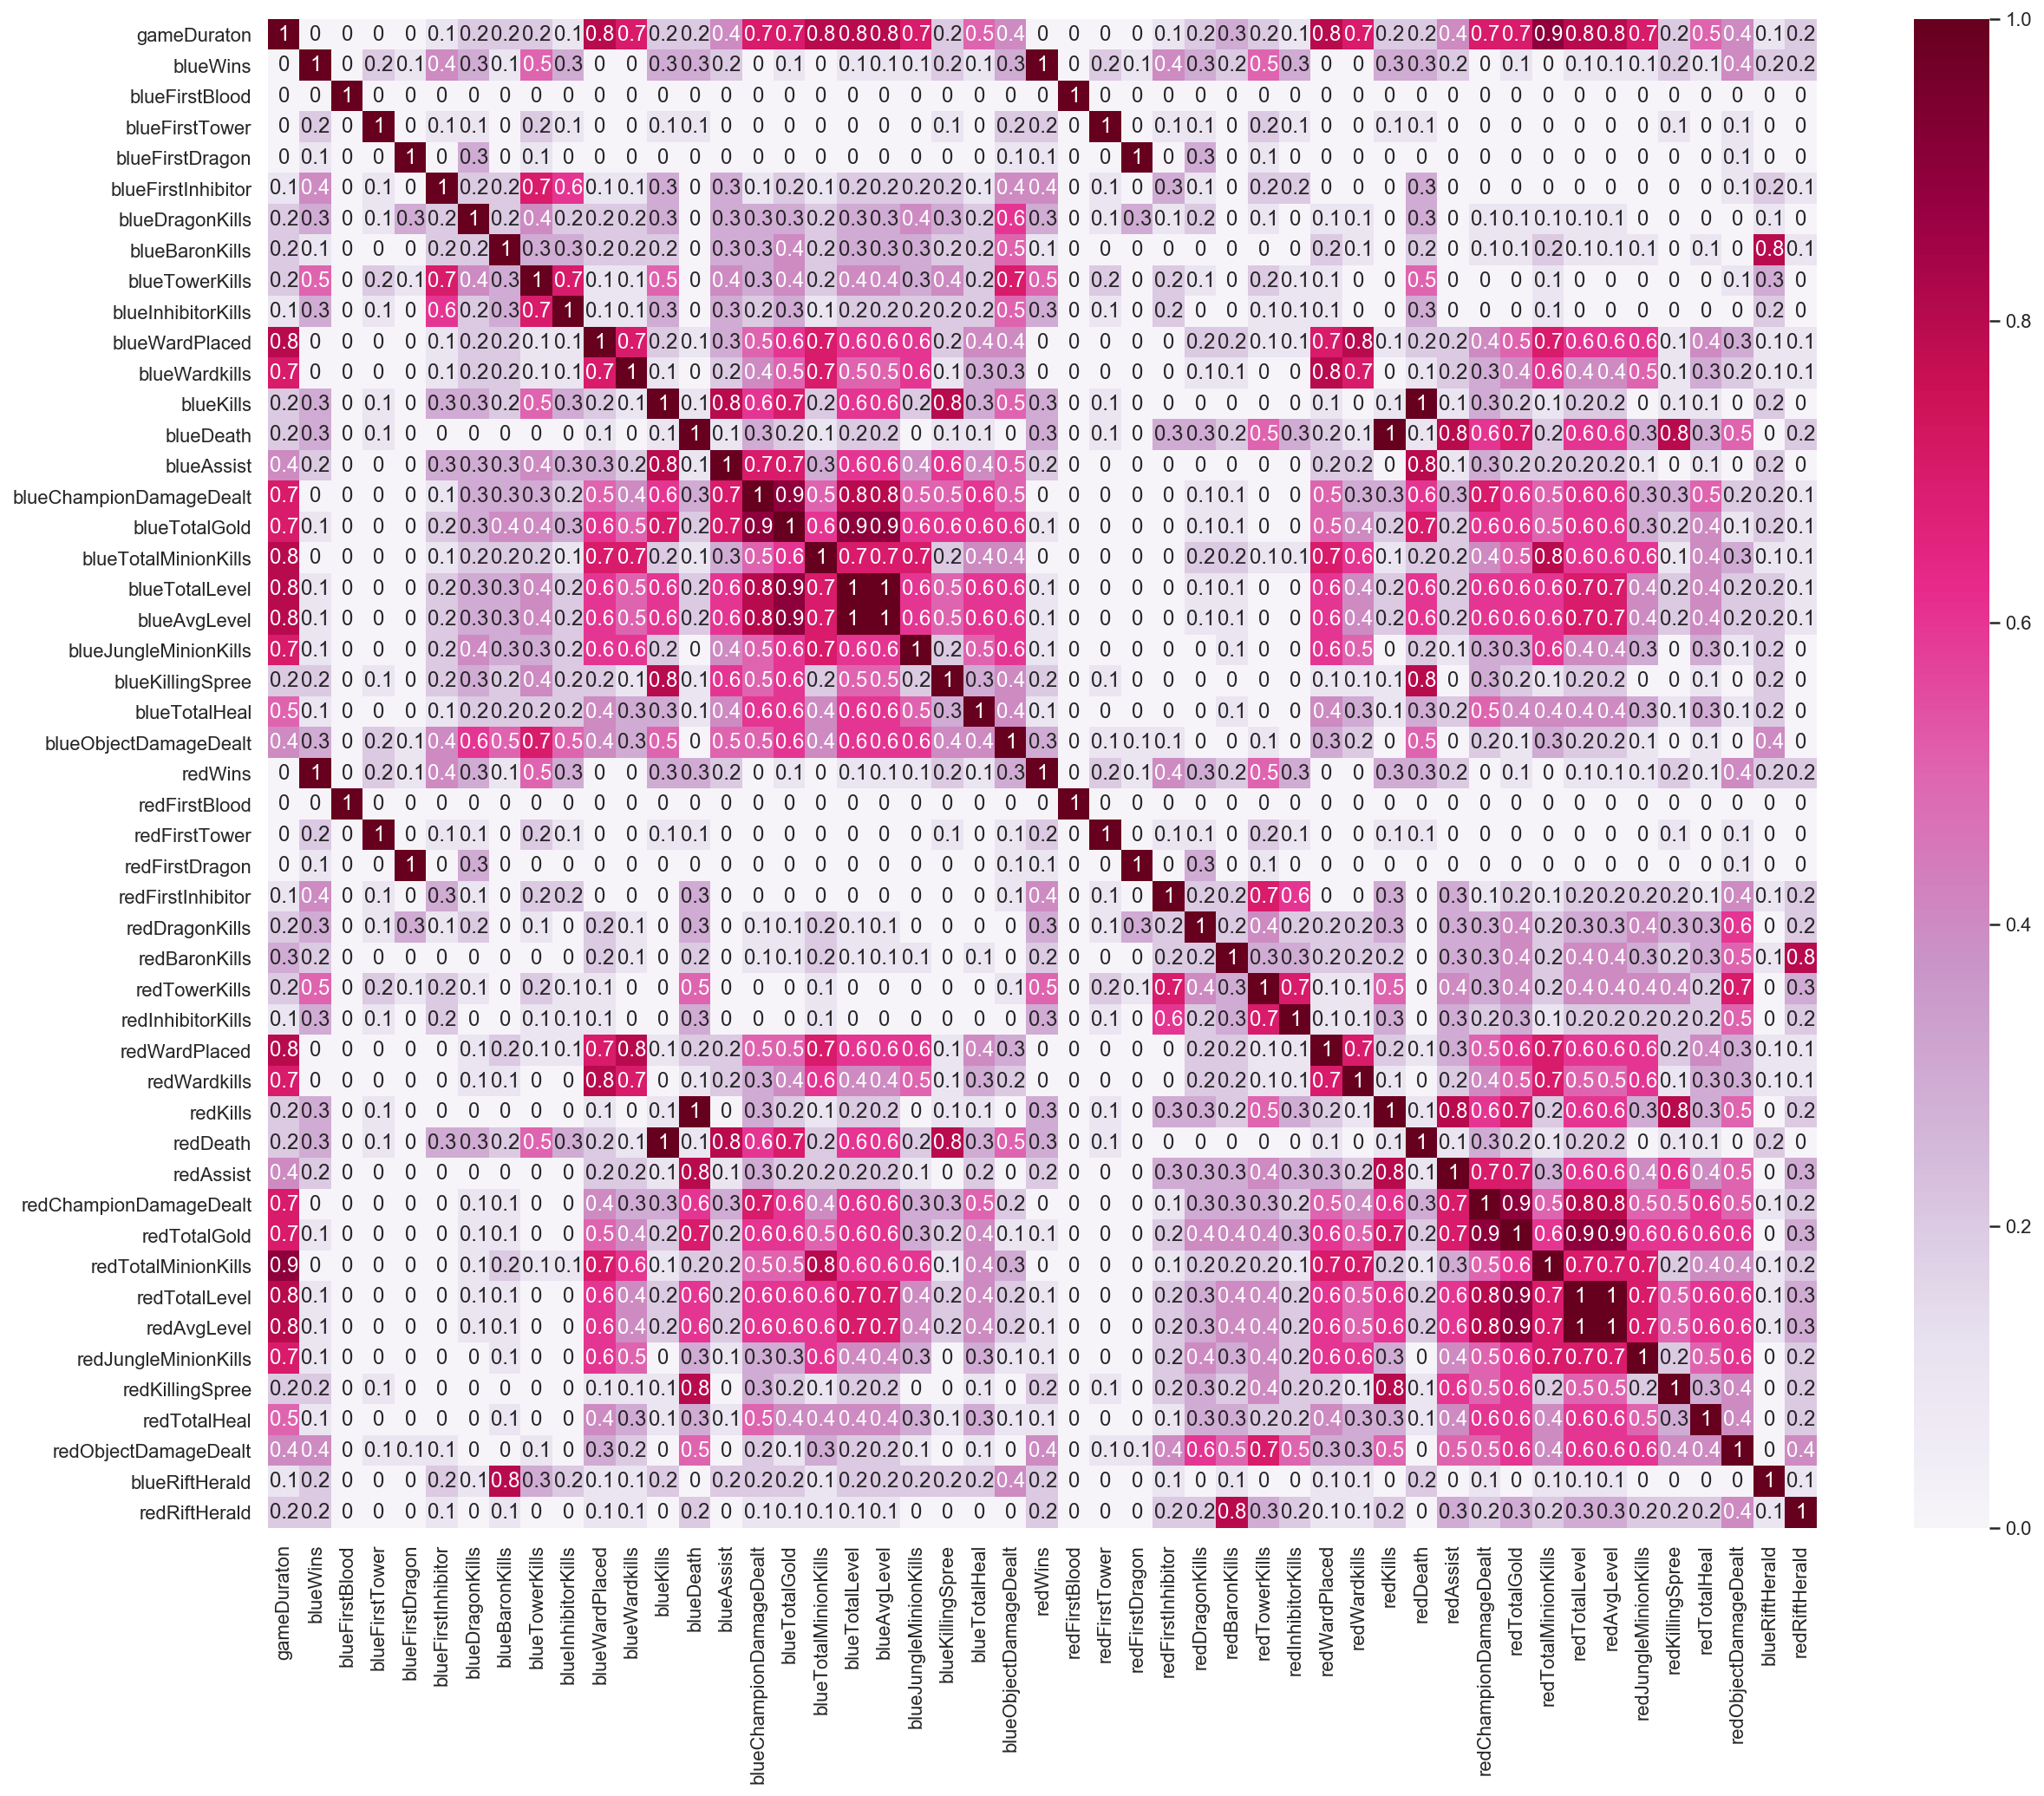

In [150]:
corr_mat = (df_c.drop(columns=['gameId']).corr()**2).round(1)
sns.set(rc={'figure.figsize': (20, 16)})
x = sns.heatmap(data=corr_mat, annot=True, cmap='PuRd')
fig.write_image('heat_map_before.jpg')

In [151]:
# 컬럼들 중 서로 관계지수가 0.8 이상인 컬럼들이 많다
dt = {}
a = []

for columns in corr_mat.columns:
    b = list(corr_mat[corr_mat[columns] >= 0.8].index)

    for items in b:
        if items in b:
            b.remove(items)

        dt[columns] = b


dt = {k: v for k, v in dt.items() if v != []}
dt

{'gameDuraton': ['blueWardPlaced',
  'blueTotalLevel',
  'redWardPlaced',
  'redTotalLevel'],
 'blueWins': ['redWins'],
 'blueFirstBlood': ['redFirstBlood'],
 'blueFirstTower': ['redFirstTower'],
 'blueFirstDragon': ['redFirstDragon'],
 'blueBaronKills': ['blueRiftHerald'],
 'blueWardPlaced': ['blueWardPlaced'],
 'blueWardkills': ['redWardPlaced'],
 'blueKills': ['blueAssist', 'redDeath'],
 'blueDeath': ['redKills', 'redKillingSpree'],
 'blueAssist': ['blueAssist'],
 'blueChampionDamageDealt': ['blueTotalGold', 'blueAvgLevel'],
 'blueTotalGold': ['blueTotalGold', 'blueAvgLevel'],
 'blueTotalMinionKills': ['blueTotalMinionKills'],
 'blueTotalLevel': ['blueChampionDamageDealt', 'blueTotalLevel'],
 'blueAvgLevel': ['blueChampionDamageDealt', 'blueTotalLevel'],
 'blueKillingSpree': ['blueKillingSpree'],
 'redWins': ['redWins'],
 'redFirstBlood': ['redFirstBlood'],
 'redFirstTower': ['redFirstTower'],
 'redFirstDragon': ['redFirstDragon'],
 'redBaronKills': ['redRiftHerald'],
 'redWardPlace

In [152]:
# red 쪽을 제거한 경우와 blue에서 red를 뺀 경우가 있다
# 양팀 모두 첫 킬 혹은 첫 타워를 처치하지 않았다면, 즉 수치가 0이라면 빼야한다

결정관계지수가 서로 1인 특성들 :
blueWin을 종속변수로 둘 때 가독성을 위해서 red 쪽 제거

- redWins < -> blueWins
- redFirstBlood < -> blueFirstBlood
- redFirstTower < -> blueFirstTower
- redKills < -> blueDeath
- redDeath < -> blueKills
- redWins < -> blueWins

df_c = df_c.drop(columns=["redWins", "redKills", "redDeath"])

"redFirstBlood","redFirstTower" 는 잠시 보류

#### 0.8 이상 중 제거대상:
#### 관계에 대한 설명이 어렵다면 feature of importances에 가서 생각해보도록 하자

- blueKills < -> blueAssist - 킬이 발생할때만 어시스트 발생
- blueKills < -> blueKillingSpree

- blueAvgLevel < -> blueChampionDamageDealt - 레벨이 올라갈수록 가할 수 있는 기본 데미지도 올라간다
- blueAvgLevel < -> blueTotalGold - 레벨에 따라 전투력이 상승해 골드 획득 속도가 늘어난다
- blueAvgLevel < -> bluetotallevel - 평균하고 총합(중 하난 빼야한다)


- gameDuraton <-> blueTotalMinionKills - 게임이 진행되는 동안 미니언은 무한정으로 등장한다
- gameDuraton <-> redTotalMinionKills - 게임이 진행될수록 챔피언 전투력이 상승해 미니언 처치가 쉬워진다

#### blueFirstBaron <-> blueBaronKills - 반면에 blueFirstDragon과 blueDragonKills는 0.3밖에 되지 않는다
- redFirstBaron <-> redBaronKills

- blueWardkills <-> redWardPlaced
- redWardkills <-> blueWardplaced - 상대편이 와드를 설치해야 처치할 수 있는 일

- blueWardPlaced <-> blueTotalMinionKills - 시간이 지날수록 많아지는 특성이 같다
- blueWardPlaced <-> redWardPlaced - 개수의 차이가 승패를 좌지우지한다면 개수의 차이와 승패의 연관을 보는게 좋을거 같다 

In [153]:
df_c["blueWardKillDiff"] = df_c.blueWardkills - df_c.redWardkills
df_c = df_c.drop(columns=['blueWardkills', 'redWardkills'])

In [154]:
import re

In [155]:
# 특성들 중 'Total'이 들어간 항목들은 팀마다 있어서 중복된다
# 경기마다 기록된 차이를 새로운 특성으로 만들고 원래 특성은 삭제하는게 좋다
re.findall("\w+Total\w+", str(list(df_c)))

['blueTotalGold',
 'blueTotalMinionKills',
 'blueTotalLevel',
 'blueTotalHeal',
 'redTotalGold',
 'redTotalMinionKills',
 'redTotalLevel',
 'redTotalHeal']

In [156]:
# 경기마다 기록된 차이를 새로운 특성으로 만들고 원래 특성은 삭제하는게 좋다
# 정글미니언도 개수 차이로 특성을 변경해줬다
df_c["blueTotalGoldDiff"] = df_c.blueTotalGold - df_c.redTotalGold
df_c["blueLevelDiff"] = df_c.blueTotalLevel - df_c.redTotalLevel
df_c["blueTotalMinionKillDiff"] = df_c.blueTotalMinionKills - \
    df_c.redTotalMinionKills

In [157]:
df_c = df_c.drop(columns=[
    'blueTotalGold',
    'redTotalGold',
    'blueTotalLevel',
    'redTotalLevel',
    'blueTotalMinionKills',
    'redTotalMinionKills',
]
)

In [158]:
len(df_c.columns)

46

# 이건 로우 전처리 이후에 형기형 데이터랑 매칭하기 위해서 이렇게 바꿨다고 하는게 나을듯

In [159]:
# 특성간에 히트맵을 쉽게 볼 수 있게 묶어서 전처리

df_c["FirstTowerDiff"] = df_c.blueFirstTower - df_c.redFirstTower
df_c["HeraldDiff"] = df_c.blueRiftHerald - df_c.redRiftHerald
df_c["FirstDragonDiff"] = df_c.blueFirstDragon - df_c.redFirstDragon
df_c["blueJungleMinionDiff"] = df_c.blueJungleMinionKills - \
    df_c.redJungleMinionKills
df_c["TotalAssistDiff"] = df_c.blueAssist - df_c.redAssist
df_c["AvgLevelDiff"] = df_c.blueAvgLevel - df_c.redAvgLevel
df_c["TowerKillDiff"] = df_c.blueTowerKills - df_c.redTowerKills

In [160]:
# 묶은 특성들 제거
df_c = df_c.drop(columns=[
    'blueJungleMinionKills',
    'redJungleMinionKills',
    'blueAssist',
    'redAssist',
    'blueTotalHeal',
    'redTotalHeal',
    'blueFirstBlood',
    'redFirstBlood',
    'blueFirstTower',
    'redFirstTower',
    'blueRiftHerald',
    'redRiftHerald',
    'blueFirstDragon',
    'redFirstDragon',
    'blueAssist',
    'redAssist',
    'blueAvgLevel',
    'redAvgLevel',
]
)

In [161]:
# 조금 더 삭제
df_c = df_c.drop(columns=[
    'blueTowerKills',
    'redTowerKills',
    'blueInhibitorKills',
    'redInhibitorKills',
    'blueFirstInhibitor',
    'redFirstInhibitor',
    'blueBaronKills',
    'redBaronKills',
    'blueChampionDamageDealt',
    'redChampionDamageDealt',
    'blueLevelDiff',
    'blueKillingSpree',
    'redKillingSpree',
    'blueObjectDamageDealt',
    'redObjectDamageDealt',
    'blueDragonKills',
    'redDragonKills',
]
)

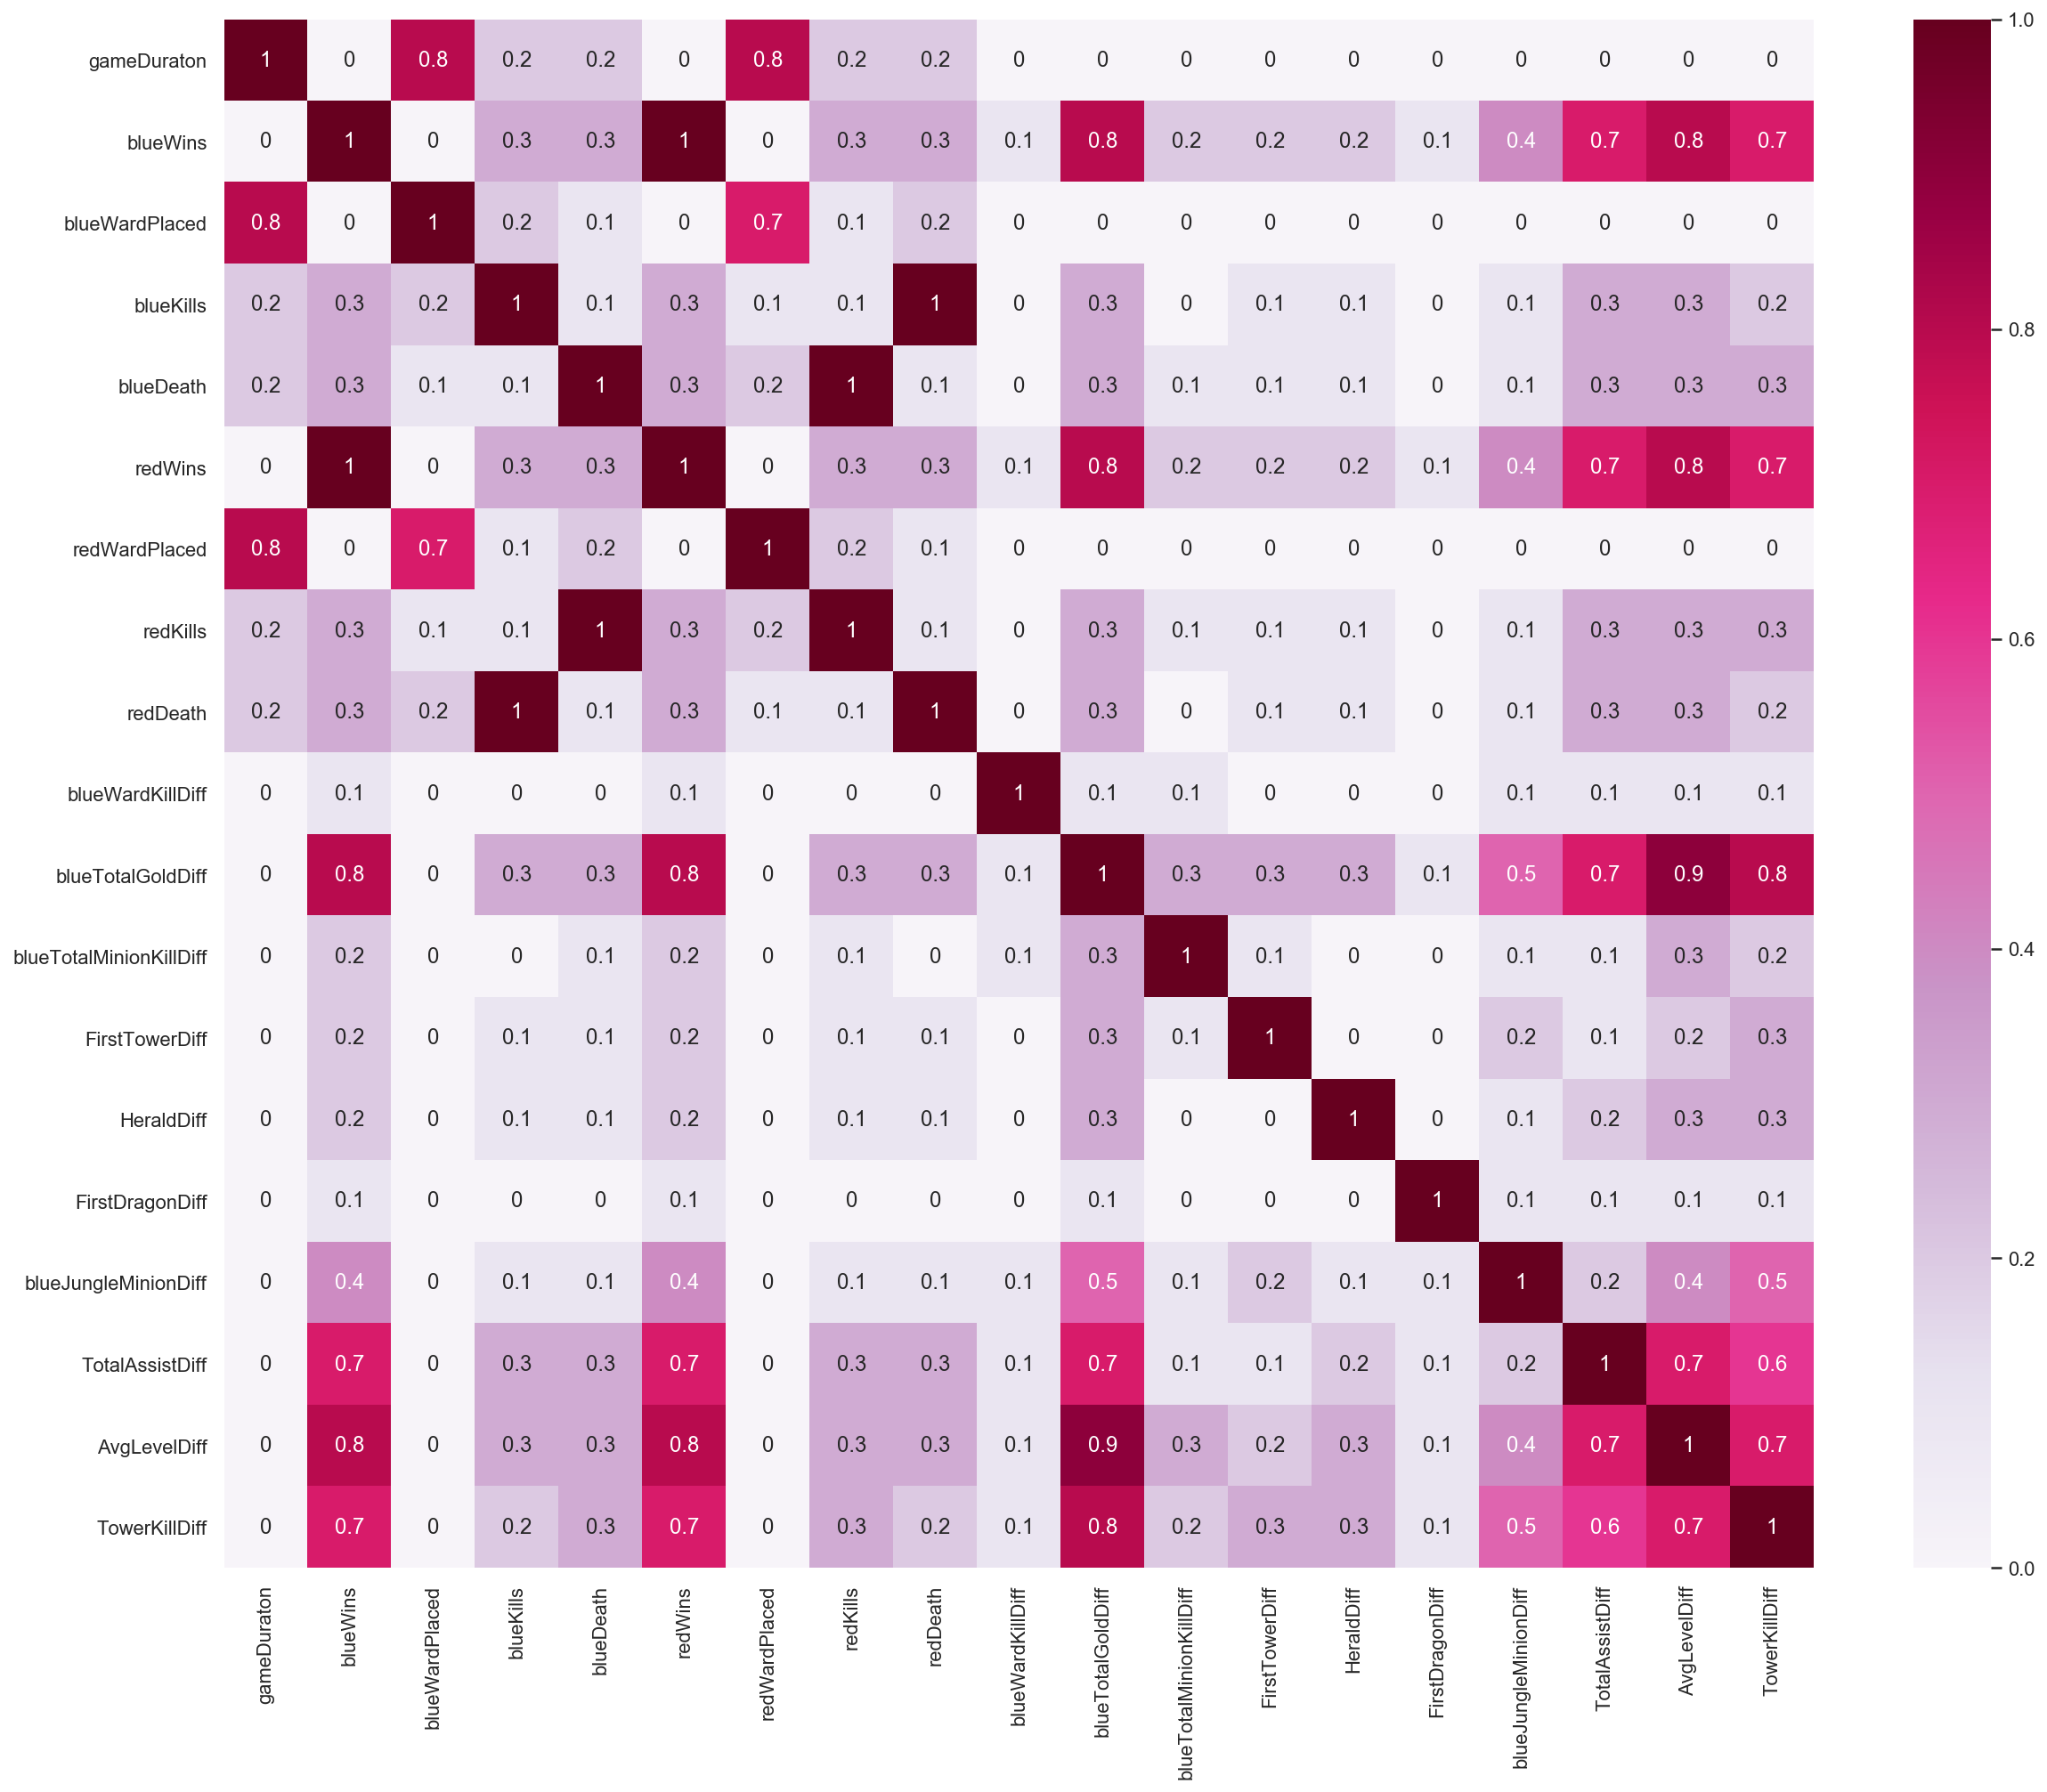

In [162]:
# 히트맵이 조금 더 보기 쉬워졌다
corr_mat_refined = (df_c.drop(columns=["gameId"]).corr()**2).round(1)
sns.set(rc={'figure.figsize': (20, 16)})
sns.heatmap(data=corr_mat_refined, annot=True, cmap='PuRd')

In [163]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 26903
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   24700 non-null  int64  
 1   gameDuraton              24700 non-null  int64  
 2   blueWins                 24700 non-null  int64  
 3   blueWardPlaced           24700 non-null  int64  
 4   blueKills                24700 non-null  int64  
 5   blueDeath                24700 non-null  int64  
 6   redWins                  24700 non-null  int64  
 7   redWardPlaced            24700 non-null  int64  
 8   redKills                 24700 non-null  int64  
 9   redDeath                 24700 non-null  int64  
 10  blueWardKillDiff         24700 non-null  int64  
 11  blueTotalGoldDiff        24700 non-null  int64  
 12  blueTotalMinionKillDiff  24700 non-null  int64  
 13  FirstTowerDiff           24700 non-null  int64  
 14  HeraldDiff            

In [164]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   24700 non-null  int64  
 1   gameDuraton              24700 non-null  int64  
 2   blueWins                 24700 non-null  int64  
 3   blueFirstBlood           24700 non-null  int64  
 4   blueFirstTower           24700 non-null  int64  
 5   blueFirstBaron           24700 non-null  int64  
 6   blueFirstDragon          24700 non-null  int64  
 7   blueFirstInhibitor       24700 non-null  int64  
 8   blueDragonKills          24700 non-null  int64  
 9   blueBaronKills           24700 non-null  int64  
 10  blueTowerKills           24700 non-null  int64  
 11  blueInhibitorKills       24700 non-null  int64  
 12  blueWardPlaced           24700 non-null  int64  
 13  blueWardkills            24700 non-null  int64  
 14  blueKills             

In [165]:
# 인덱스도 리셋
df_c.reset_index(drop=True, inplace=True)

# 바론을 떠나서 전령 마저 왜 이렇게 안 챙겼을까?

# 메타에 대한 설명 
# 아웃오브메타를 드래곤 바론 타워 억제기에 적용

In [166]:
import seaborn as sns
import matplotlib. pyplot as plt

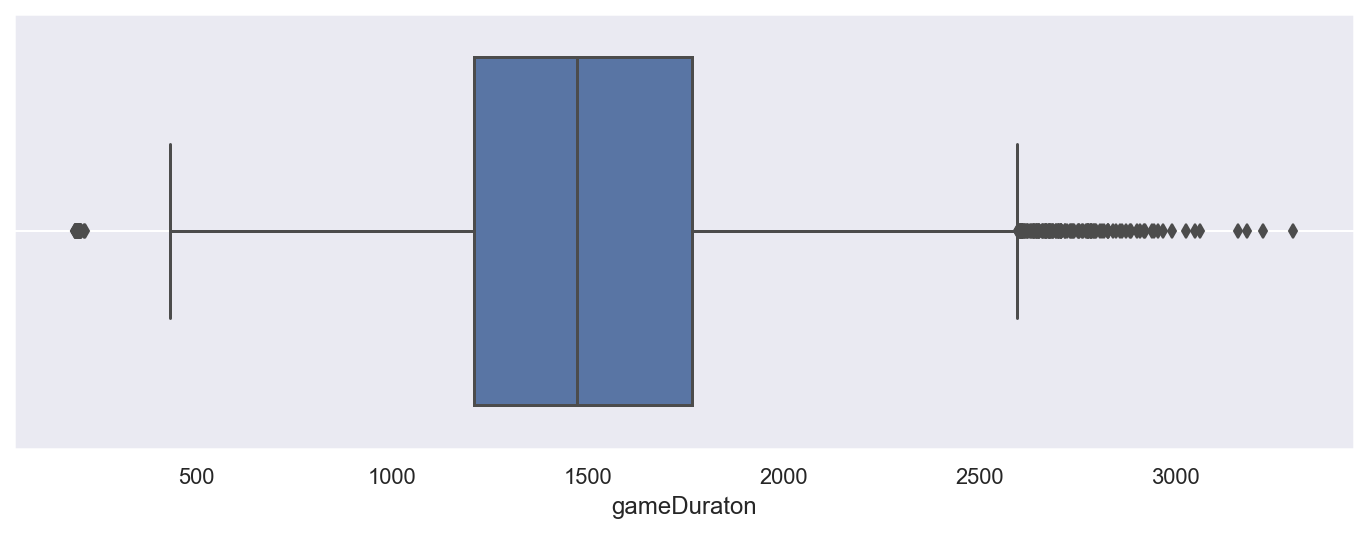

In [167]:
plt.figure(figsize=(12, 4))
sns.boxplot(df_c["gameDuraton"])
plt.grid()
plt.show()

In [168]:
q1 = np.percentile(df_c["gameDuraton"], 25)
q3 = np.percentile(df_c["gameDuraton"], 75)
iqr = q3 - q1
(q1-iqr*1.5)/60, q1/60, q3/60, (q3+iqr*1.5)/60

(6.291666666666667, 20.166666666666668, 29.416666666666668, 43.291666666666664)

In [169]:
# 절반의 데이터가 양팀 모두 전령을 처치하지 않았다고 한다
# 실버들에게는 있을 수 없는 일이다 - 우리는 무조건 처치해야한다
# 성향차이는 게임메타에 대한 이해도 격차에서 발생한다
# 메타란?
# 아웃오브메타란?
pd.crosstab(df.blueFirstBaron, df.redFirstBaron)

redFirstBaron       0     1
blueFirstBaron             
0               13164  7173
1                6567     0

잘하면 잘 할수록 안정적으로 플레이한다
다시 말해 리스크를 동반한 변수를 만들지 않고
상대팀이 아웃오브메타 상황에 진입했을때 그걸 우리팀이 유리하게 가져오는 위주로 플레이한다
더 많이 가져오는 팀이 이길 확률이 높아진다

게임시간이 길어질수록 오브젝트도 더 많이 처치하기 때문에 둘의 결정관계지수는 높을 것이라 예상
그러나 오브젝트들 마다 결정관계가 다르다.
우리는 이게 앞서 언급된 아웃오브메타에 대한 변수라고 주장
시간과 오브젝트 처치수의 결정관계가 높을수록 오브젝트를 가져오는건 메타
시간과 오브젝트 처치수의 결정관계가 낮을수록 오브젝트를 가져오는건 아웃오브메타

그래서 변수가 낮은 오브젝트를 노린다는건 가장 리스크가 동반됐다고 본다

- 1. 50%의 게임은 20분에서 30분 사이에 승패가 갈렸다.
- 2-1. 처치 가능한 오브젝트들 중 게임시간과 선형관계가 0.3 이하인 항목들:
    - 드래곤 0.2~0.3
    - 바론 0.3
    - 타워 0.2
    - 억제기 0.1
    - 챔피언 킬 데스 어시 각각 0.1씩 < -> 챔피언에게 가한 데미지는 0.5인 반면 잘 죽지 않는다
- 2-2. 처치 가능한 오브젝트들 중 게임시간과 선형관계가 높았던 항목들:
    - 정글 미니언 0.6
    - 미니언 0.8
    - 와드 0.7

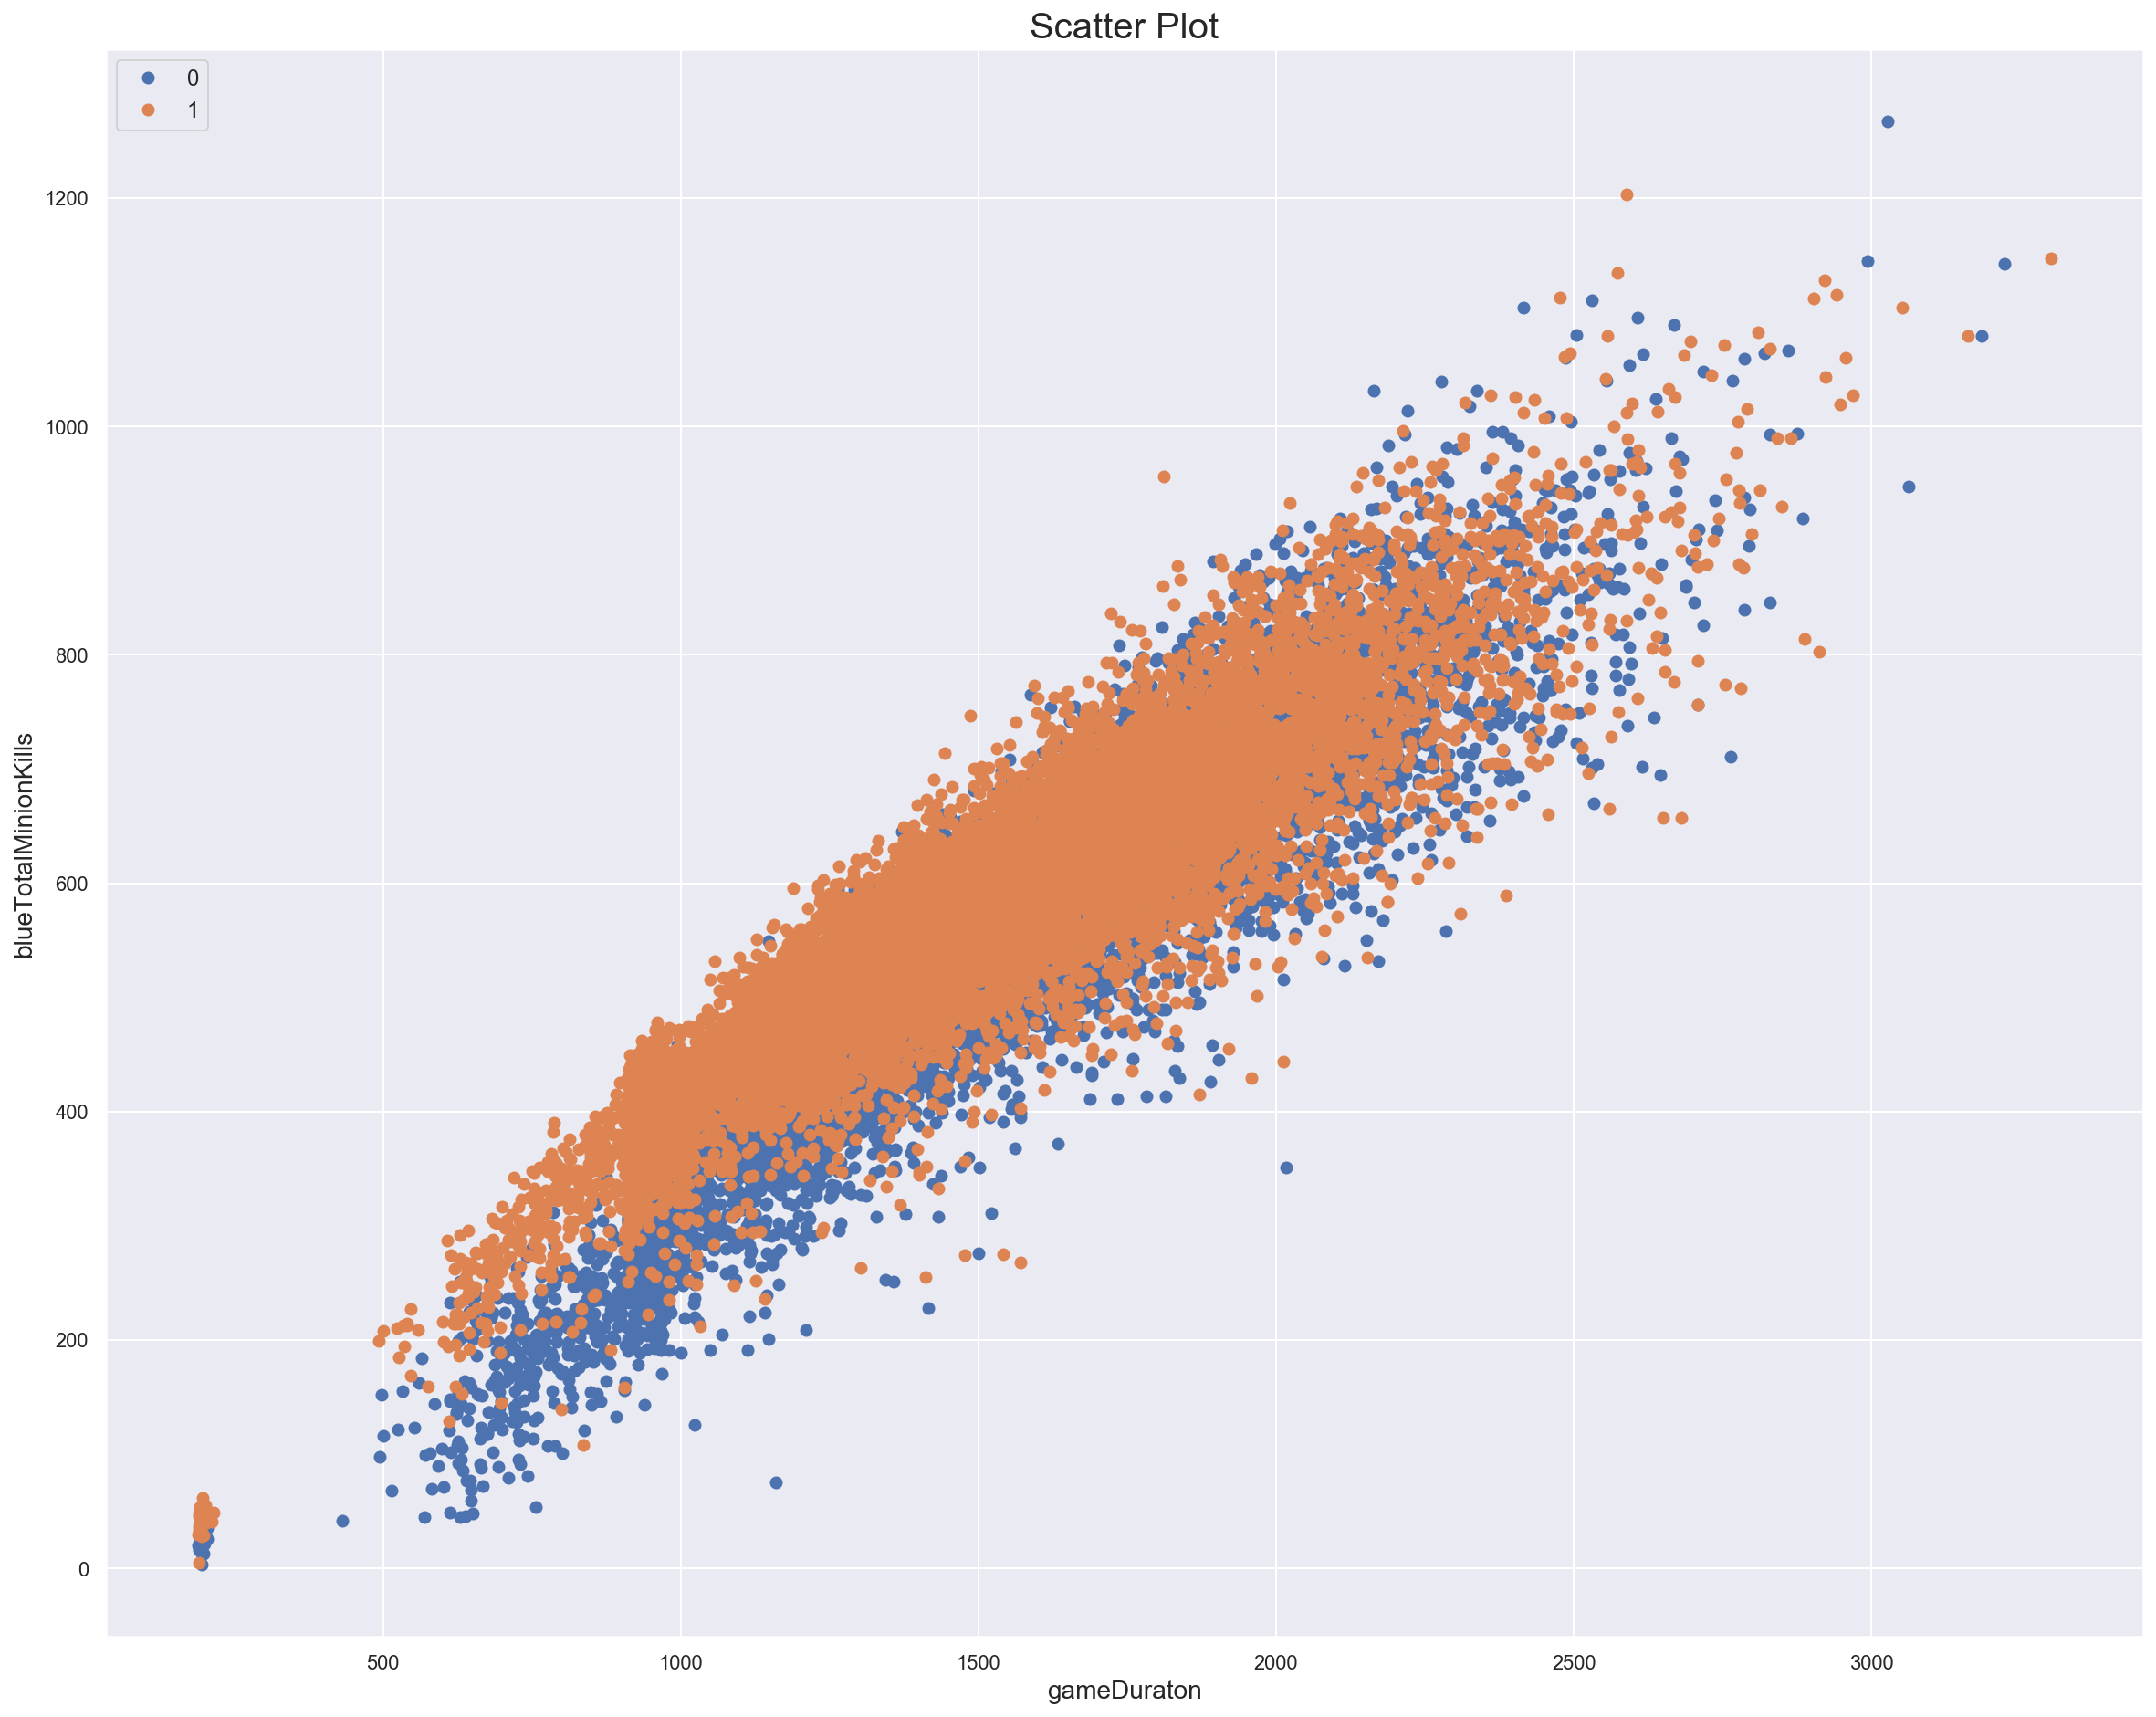

In [170]:
groups = df_r.groupby('blueWins')


fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.gameDuraton,

            group.blueTotalMinionKills,

            marker='o',

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('gameDuraton', fontsize=14)

plt.ylabel('blueTotalMinionKills', fontsize=14)

plt.show()

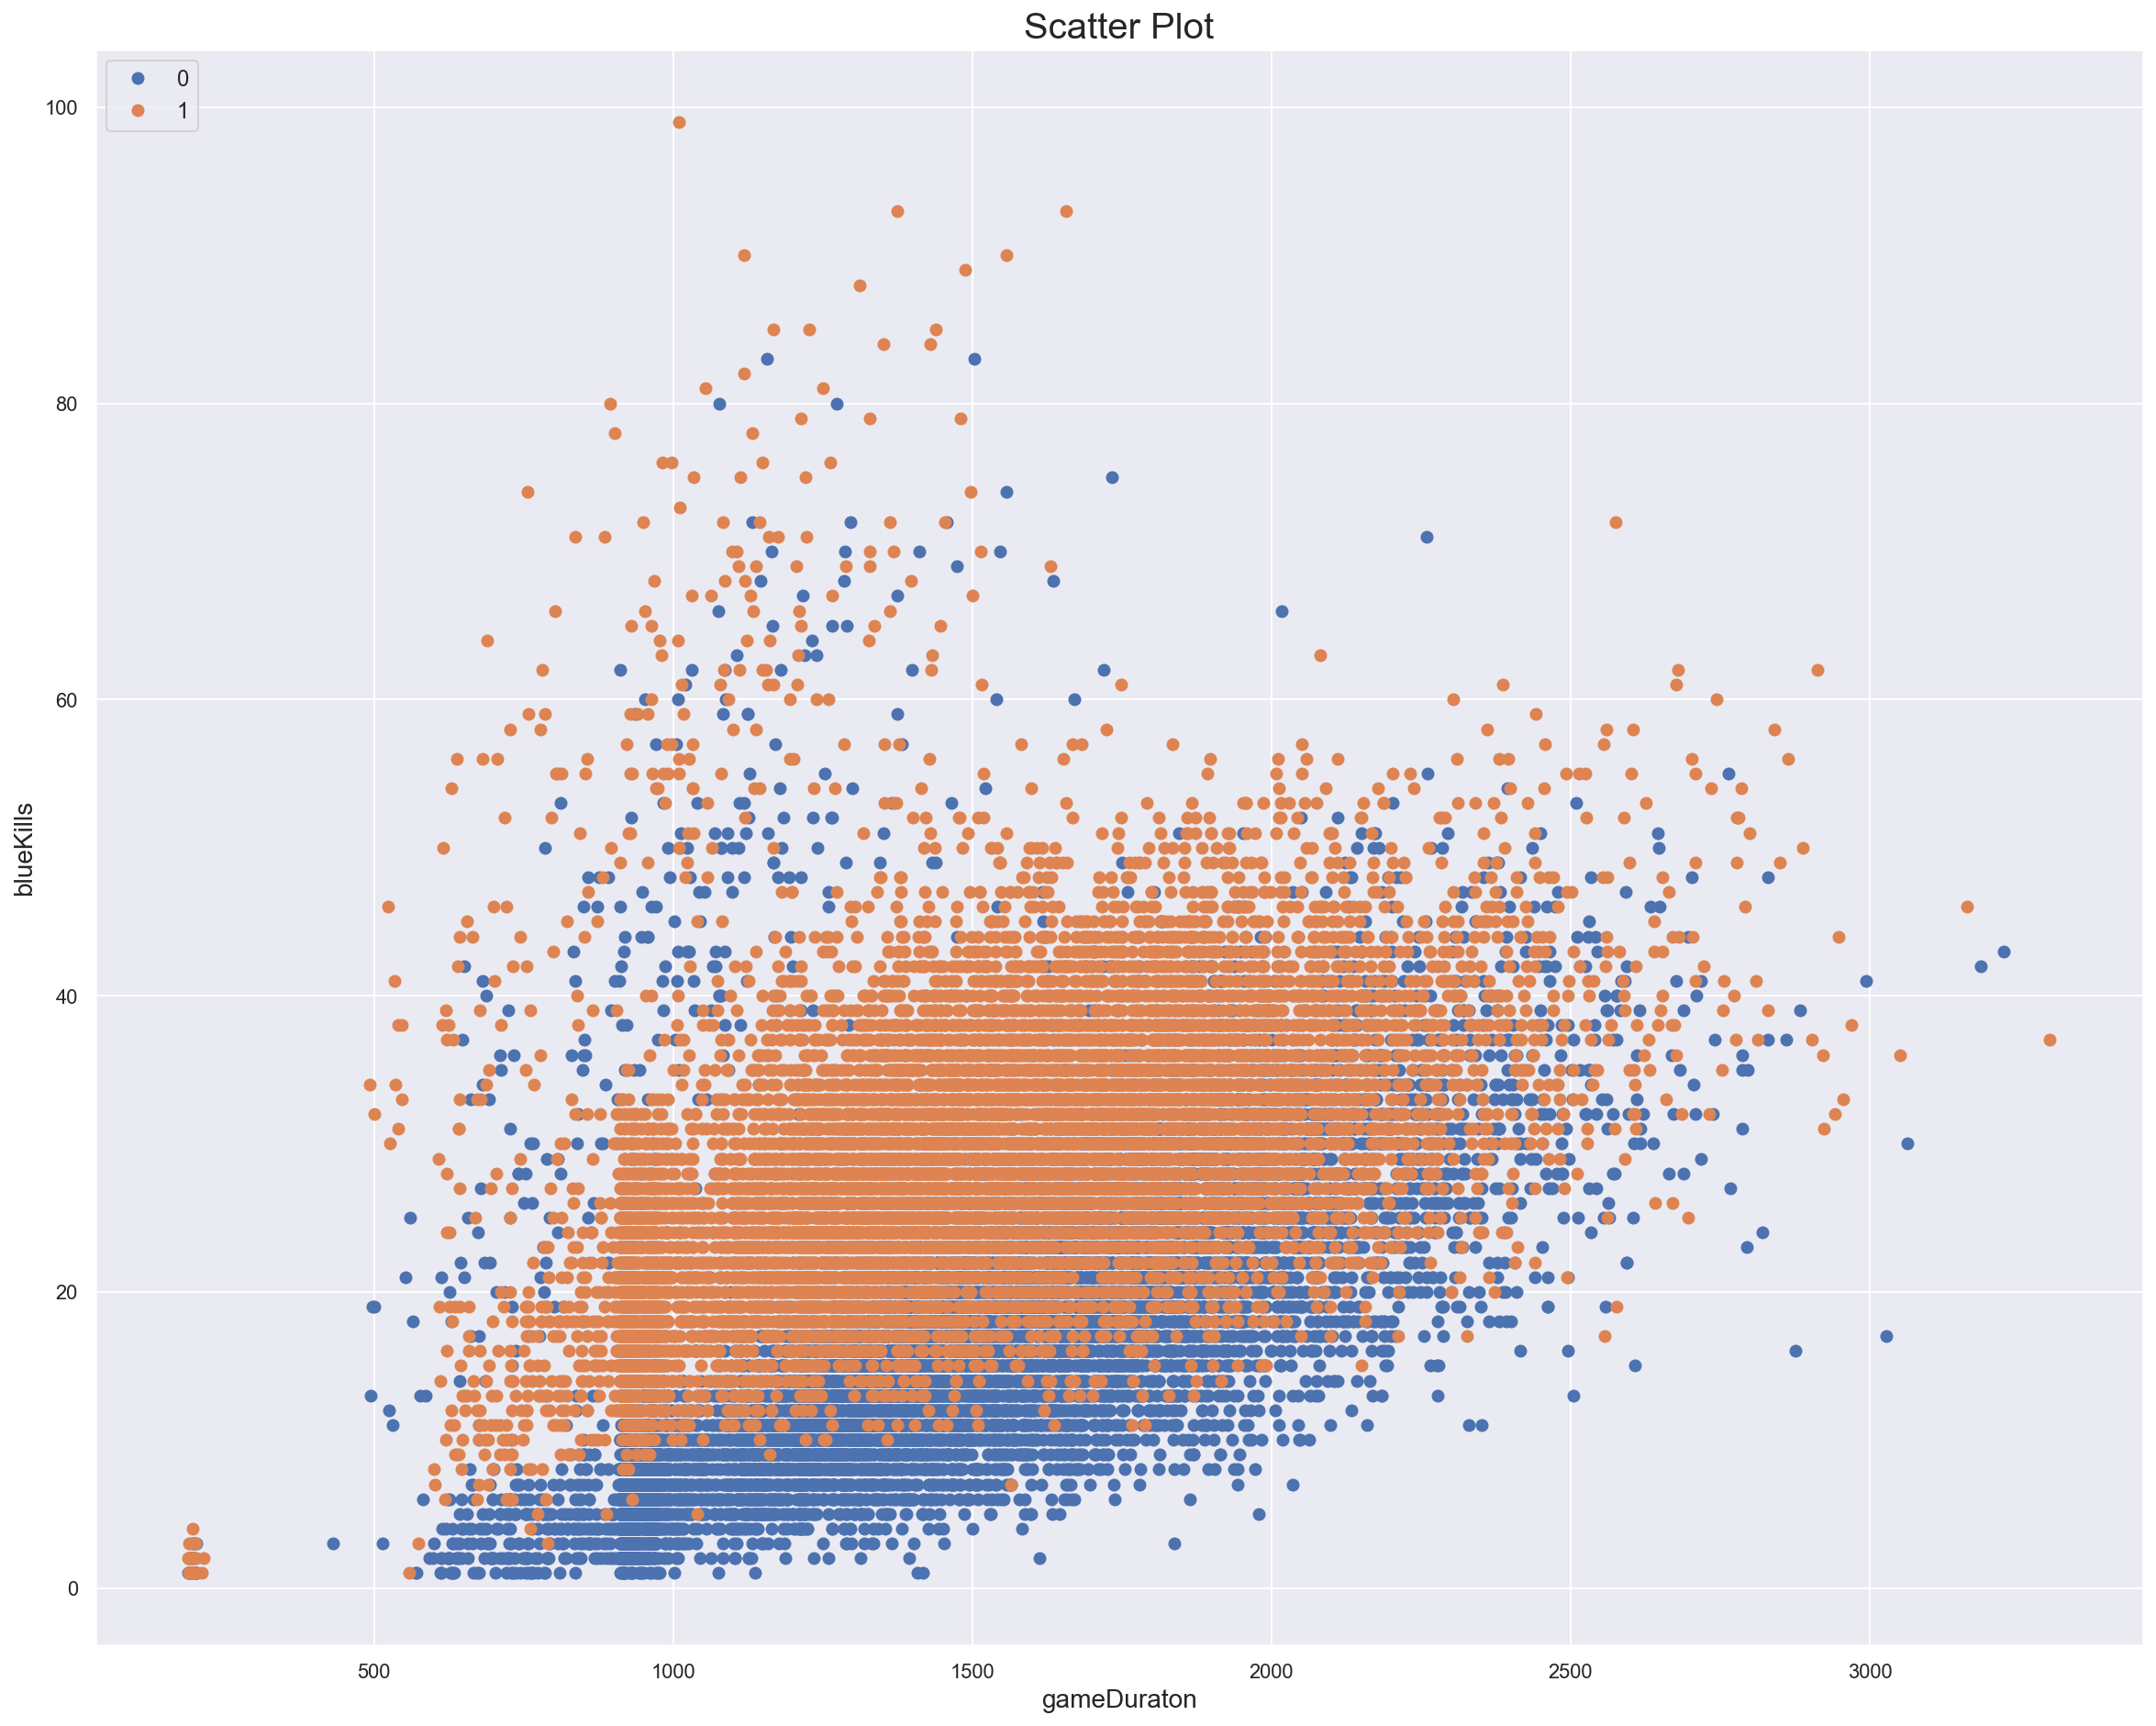

In [171]:
groups = df_r.groupby('blueWins')


fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.gameDuraton,

            group.blueKills,

            marker='o',

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('gameDuraton', fontsize=14)

plt.ylabel('blueKills', fontsize=14)

plt.show()

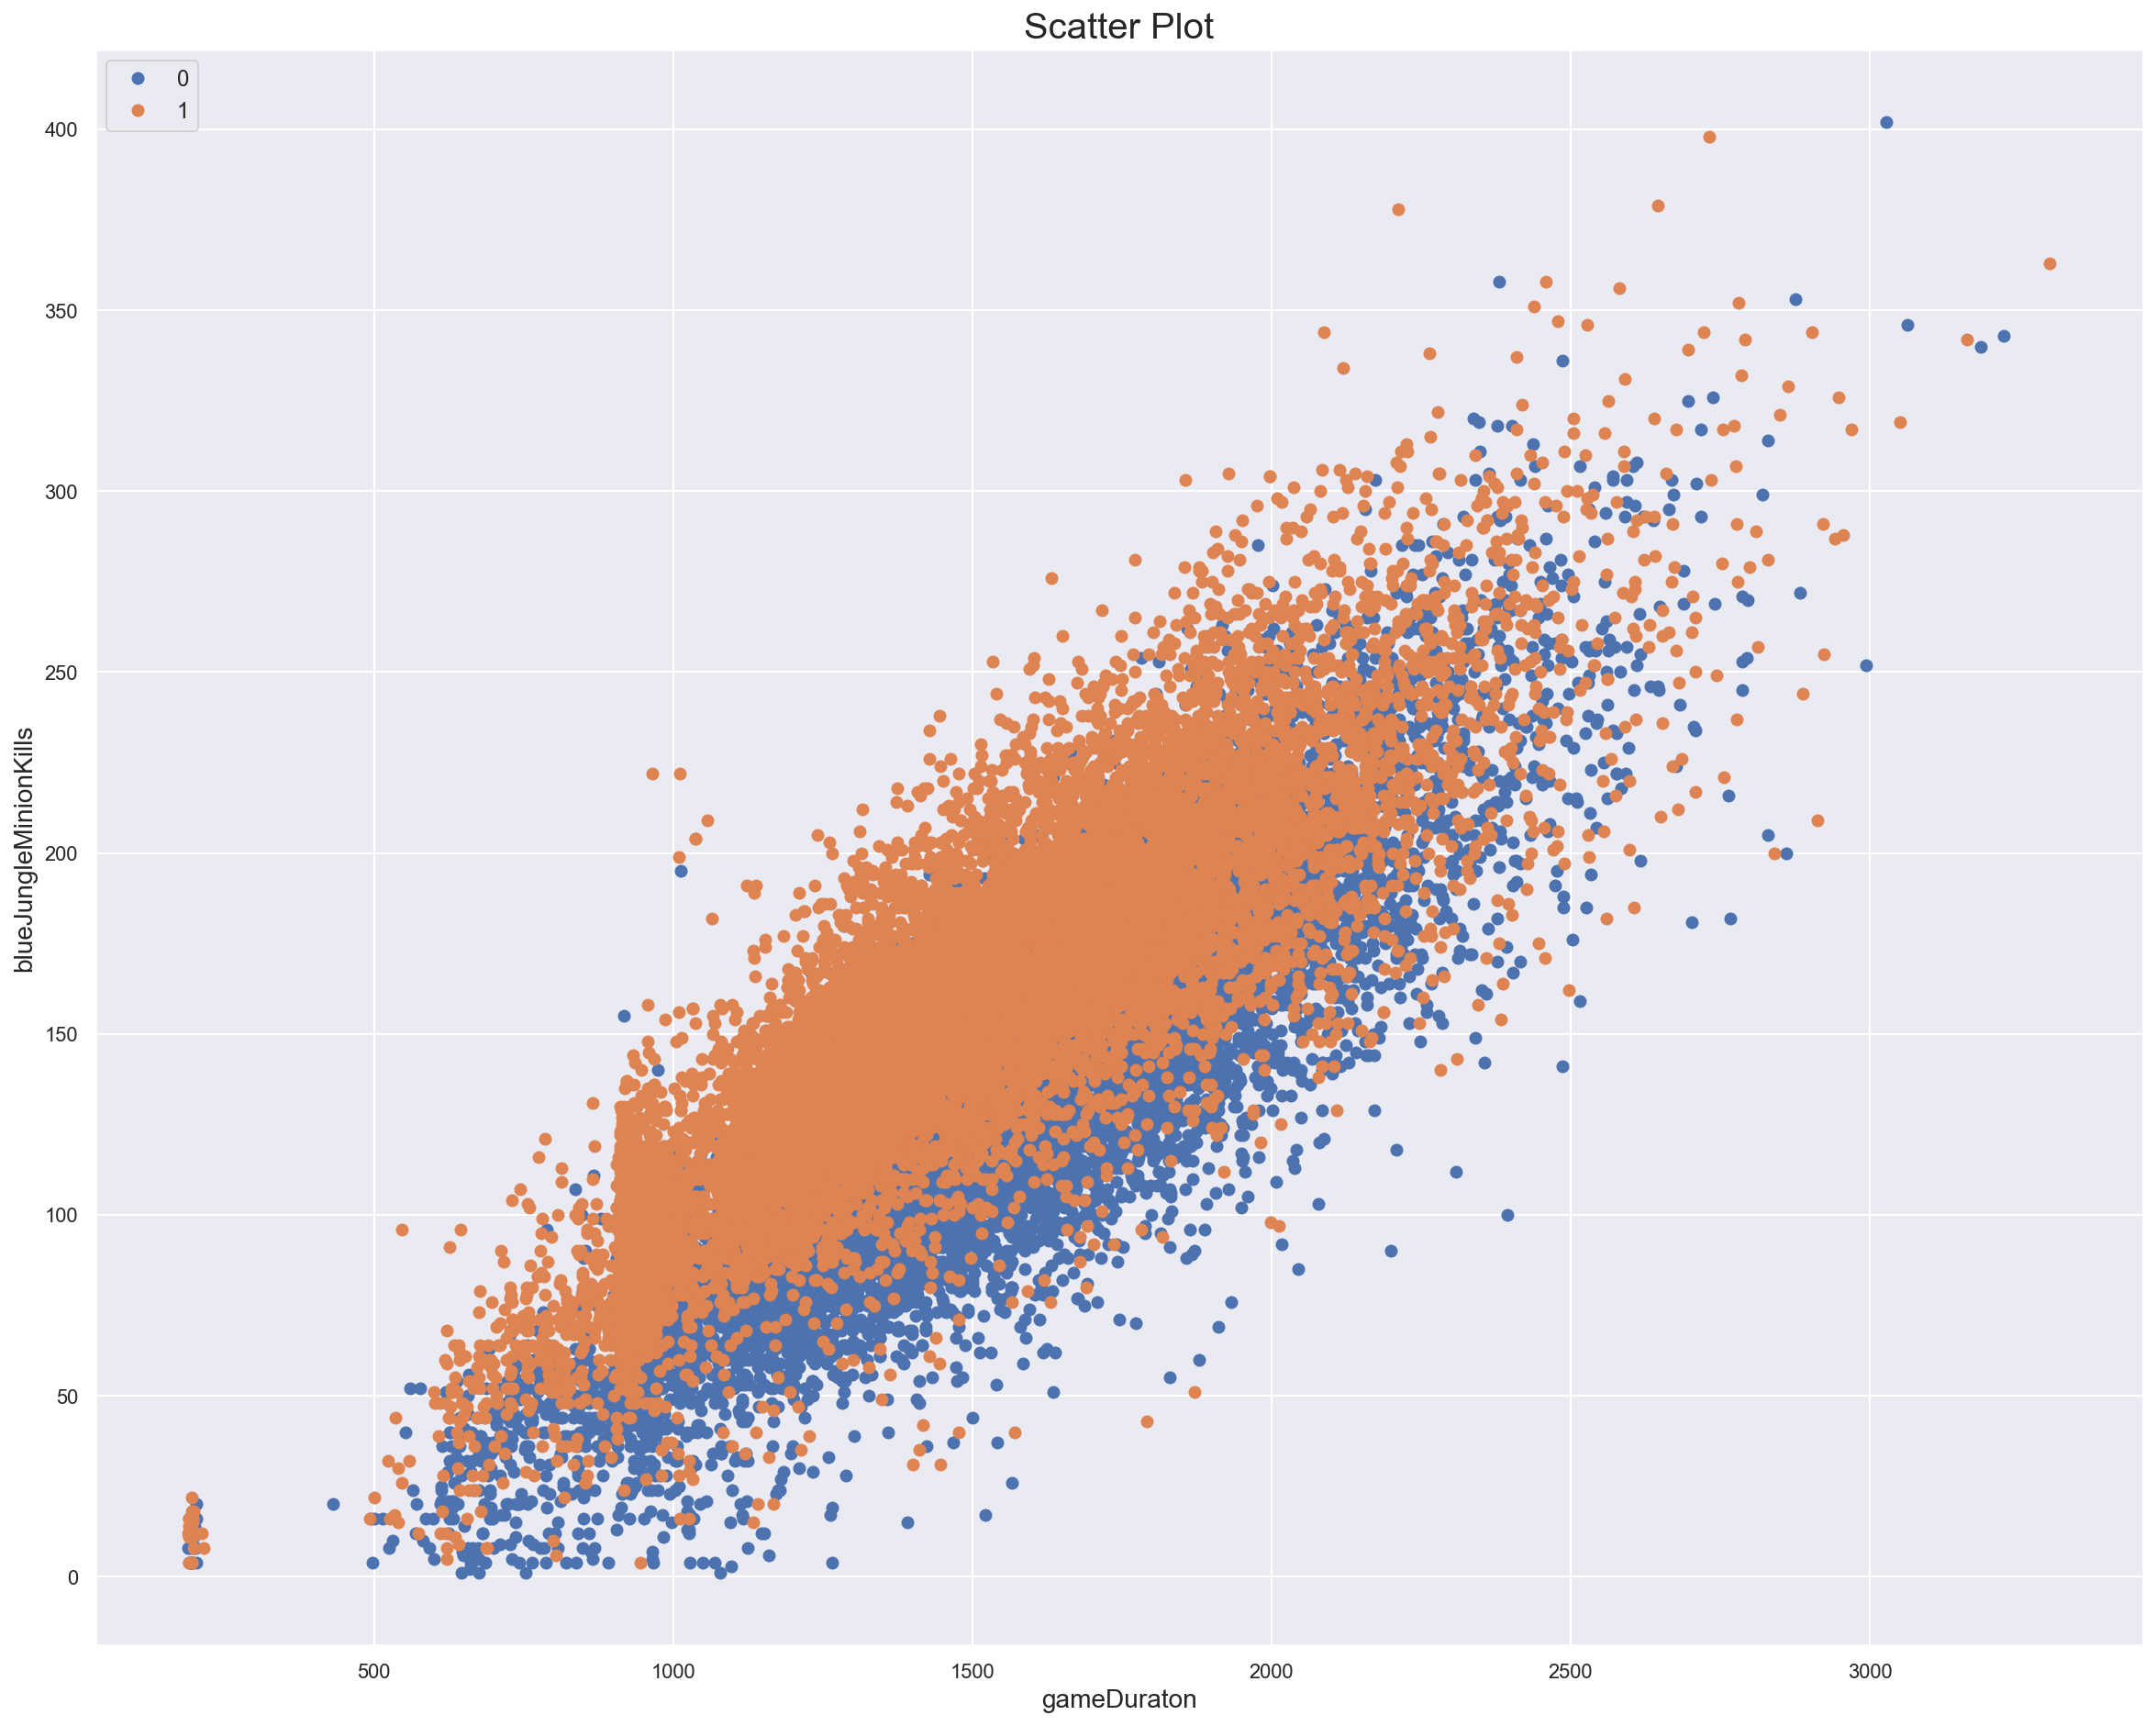

In [172]:
groups = df_r.groupby('blueWins')


fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.gameDuraton,

            group.blueJungleMinionKills,

            marker='o',

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('gameDuraton', fontsize=14)

plt.ylabel('blueJungleMinionKills', fontsize=14)

plt.show()

# 선형회귀 구하는 방법 물어보기

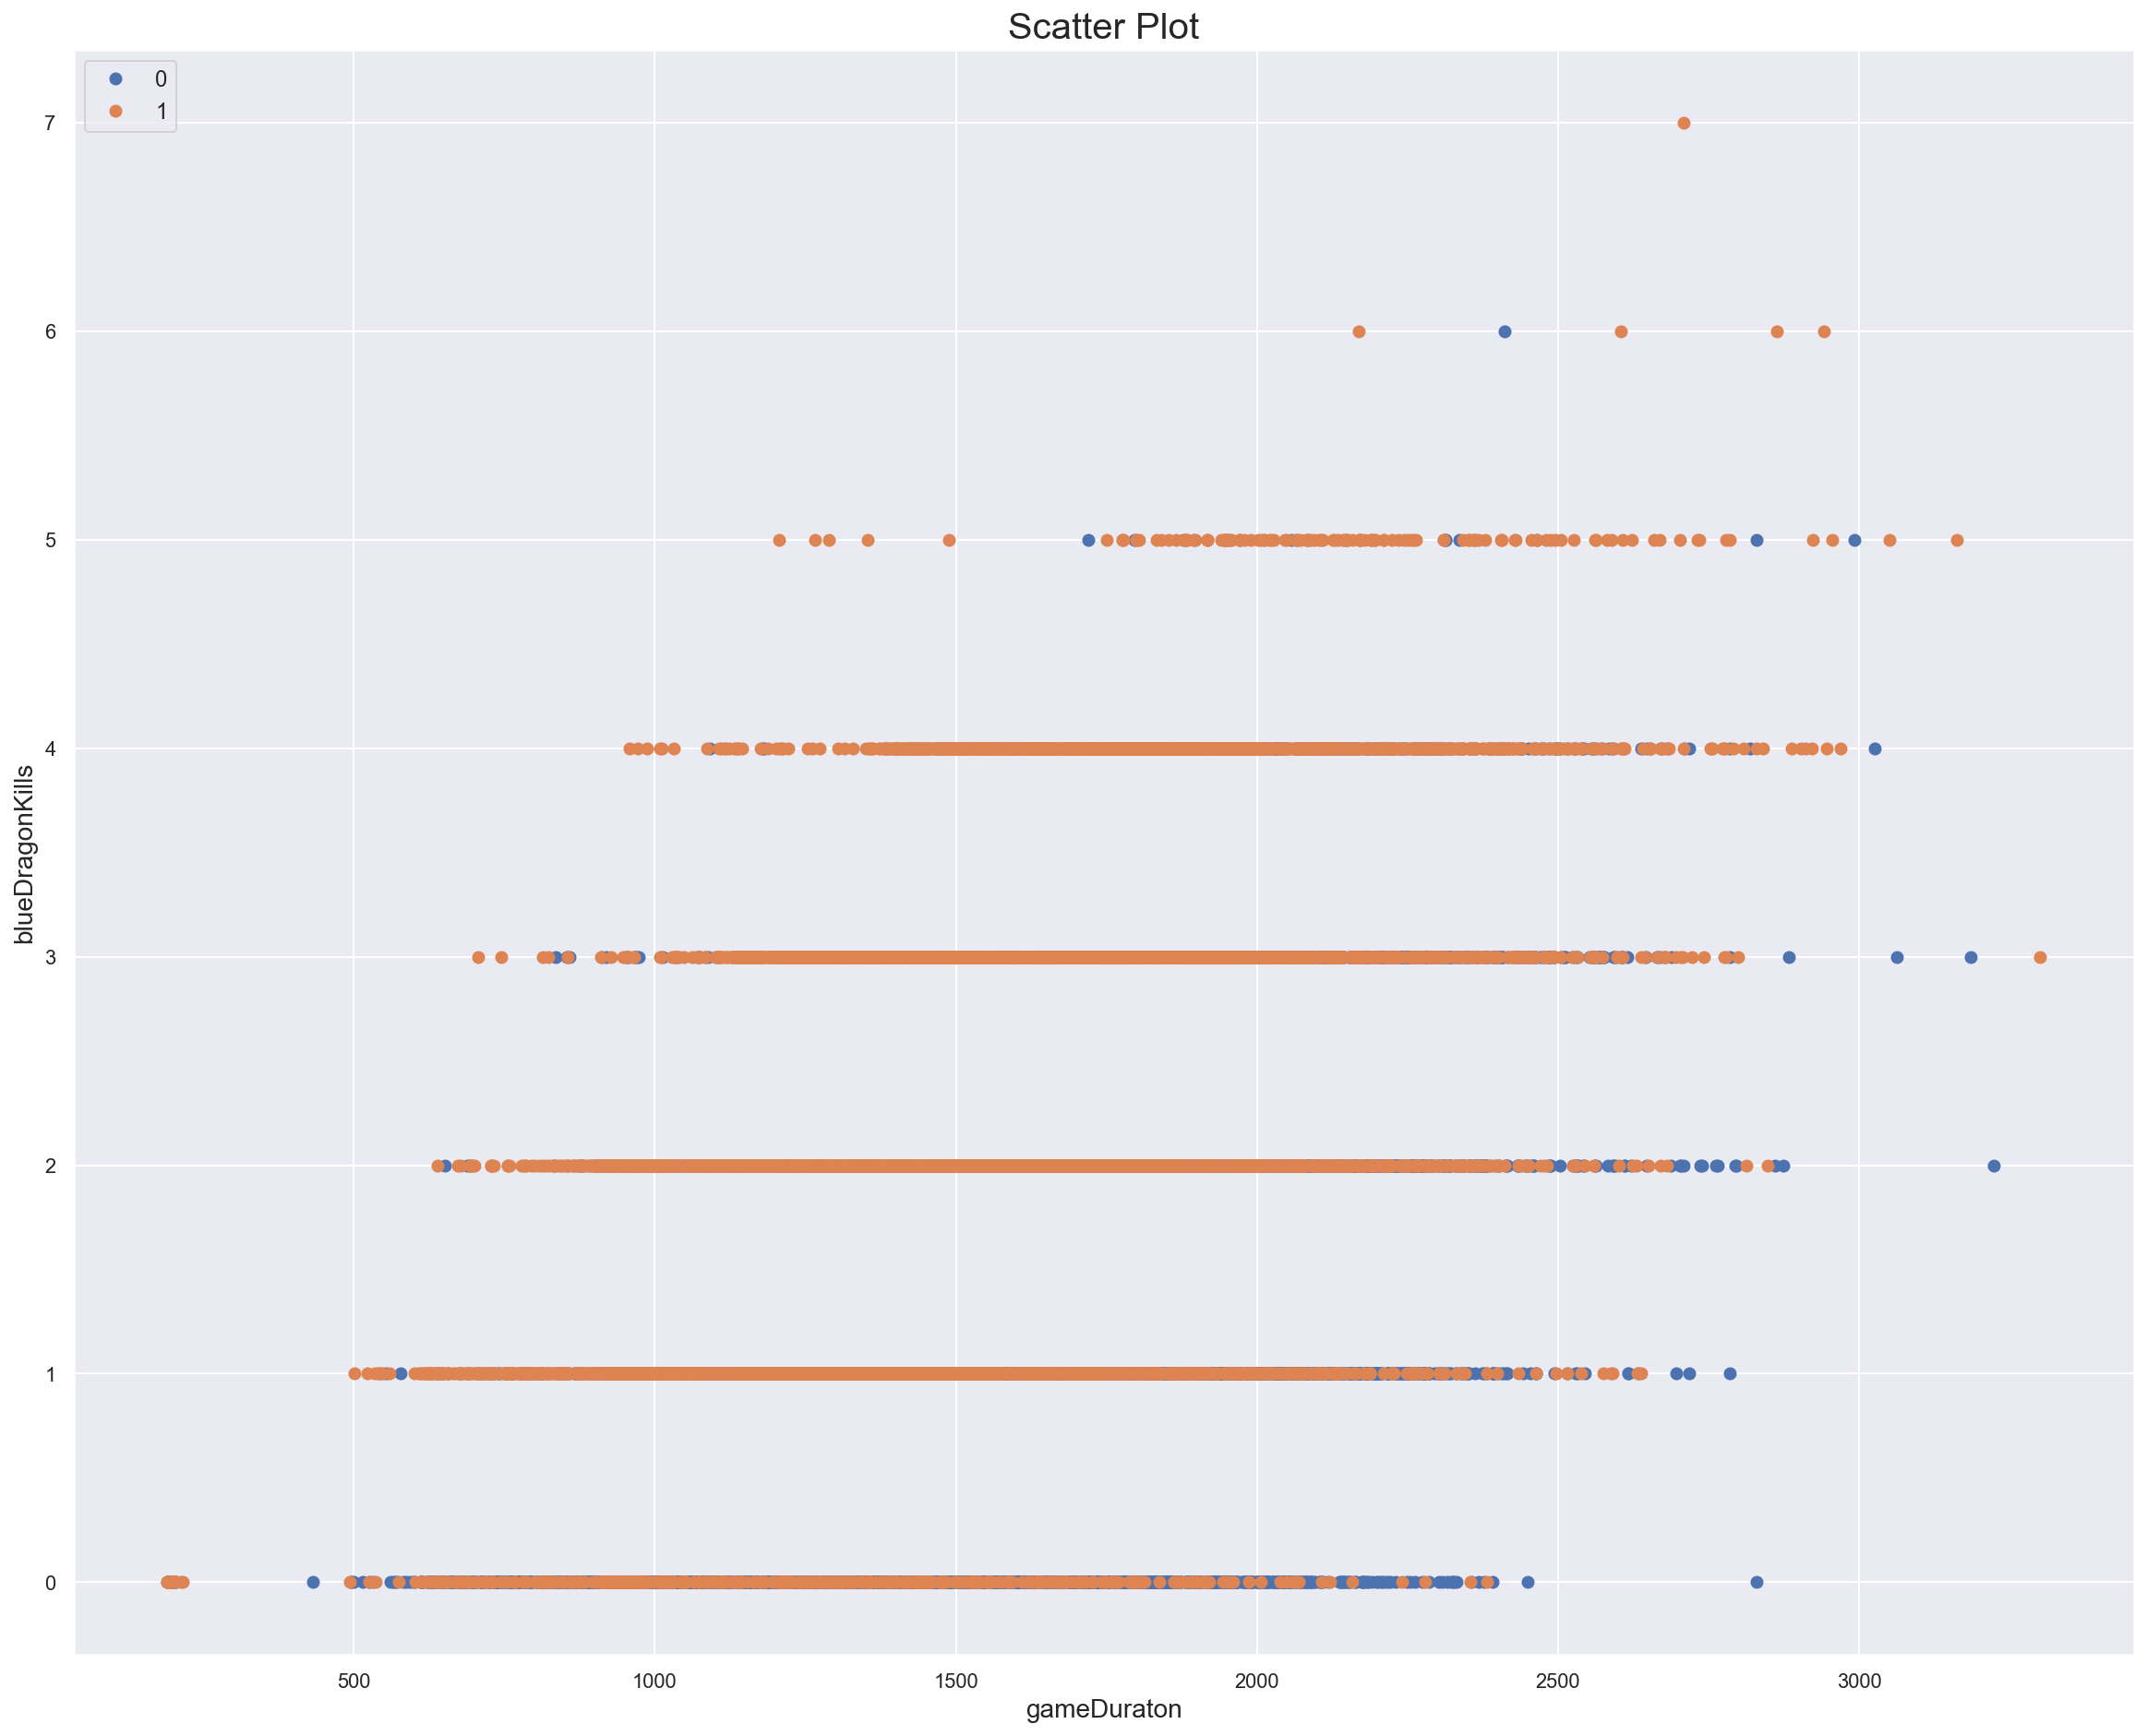

In [173]:
groups = df_r.groupby('blueWins')


fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.gameDuraton,

            group.blueDragonKills,

            marker='o',

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('gameDuraton', fontsize=14)

plt.ylabel('blueDragonKills', fontsize=14)

plt.show()

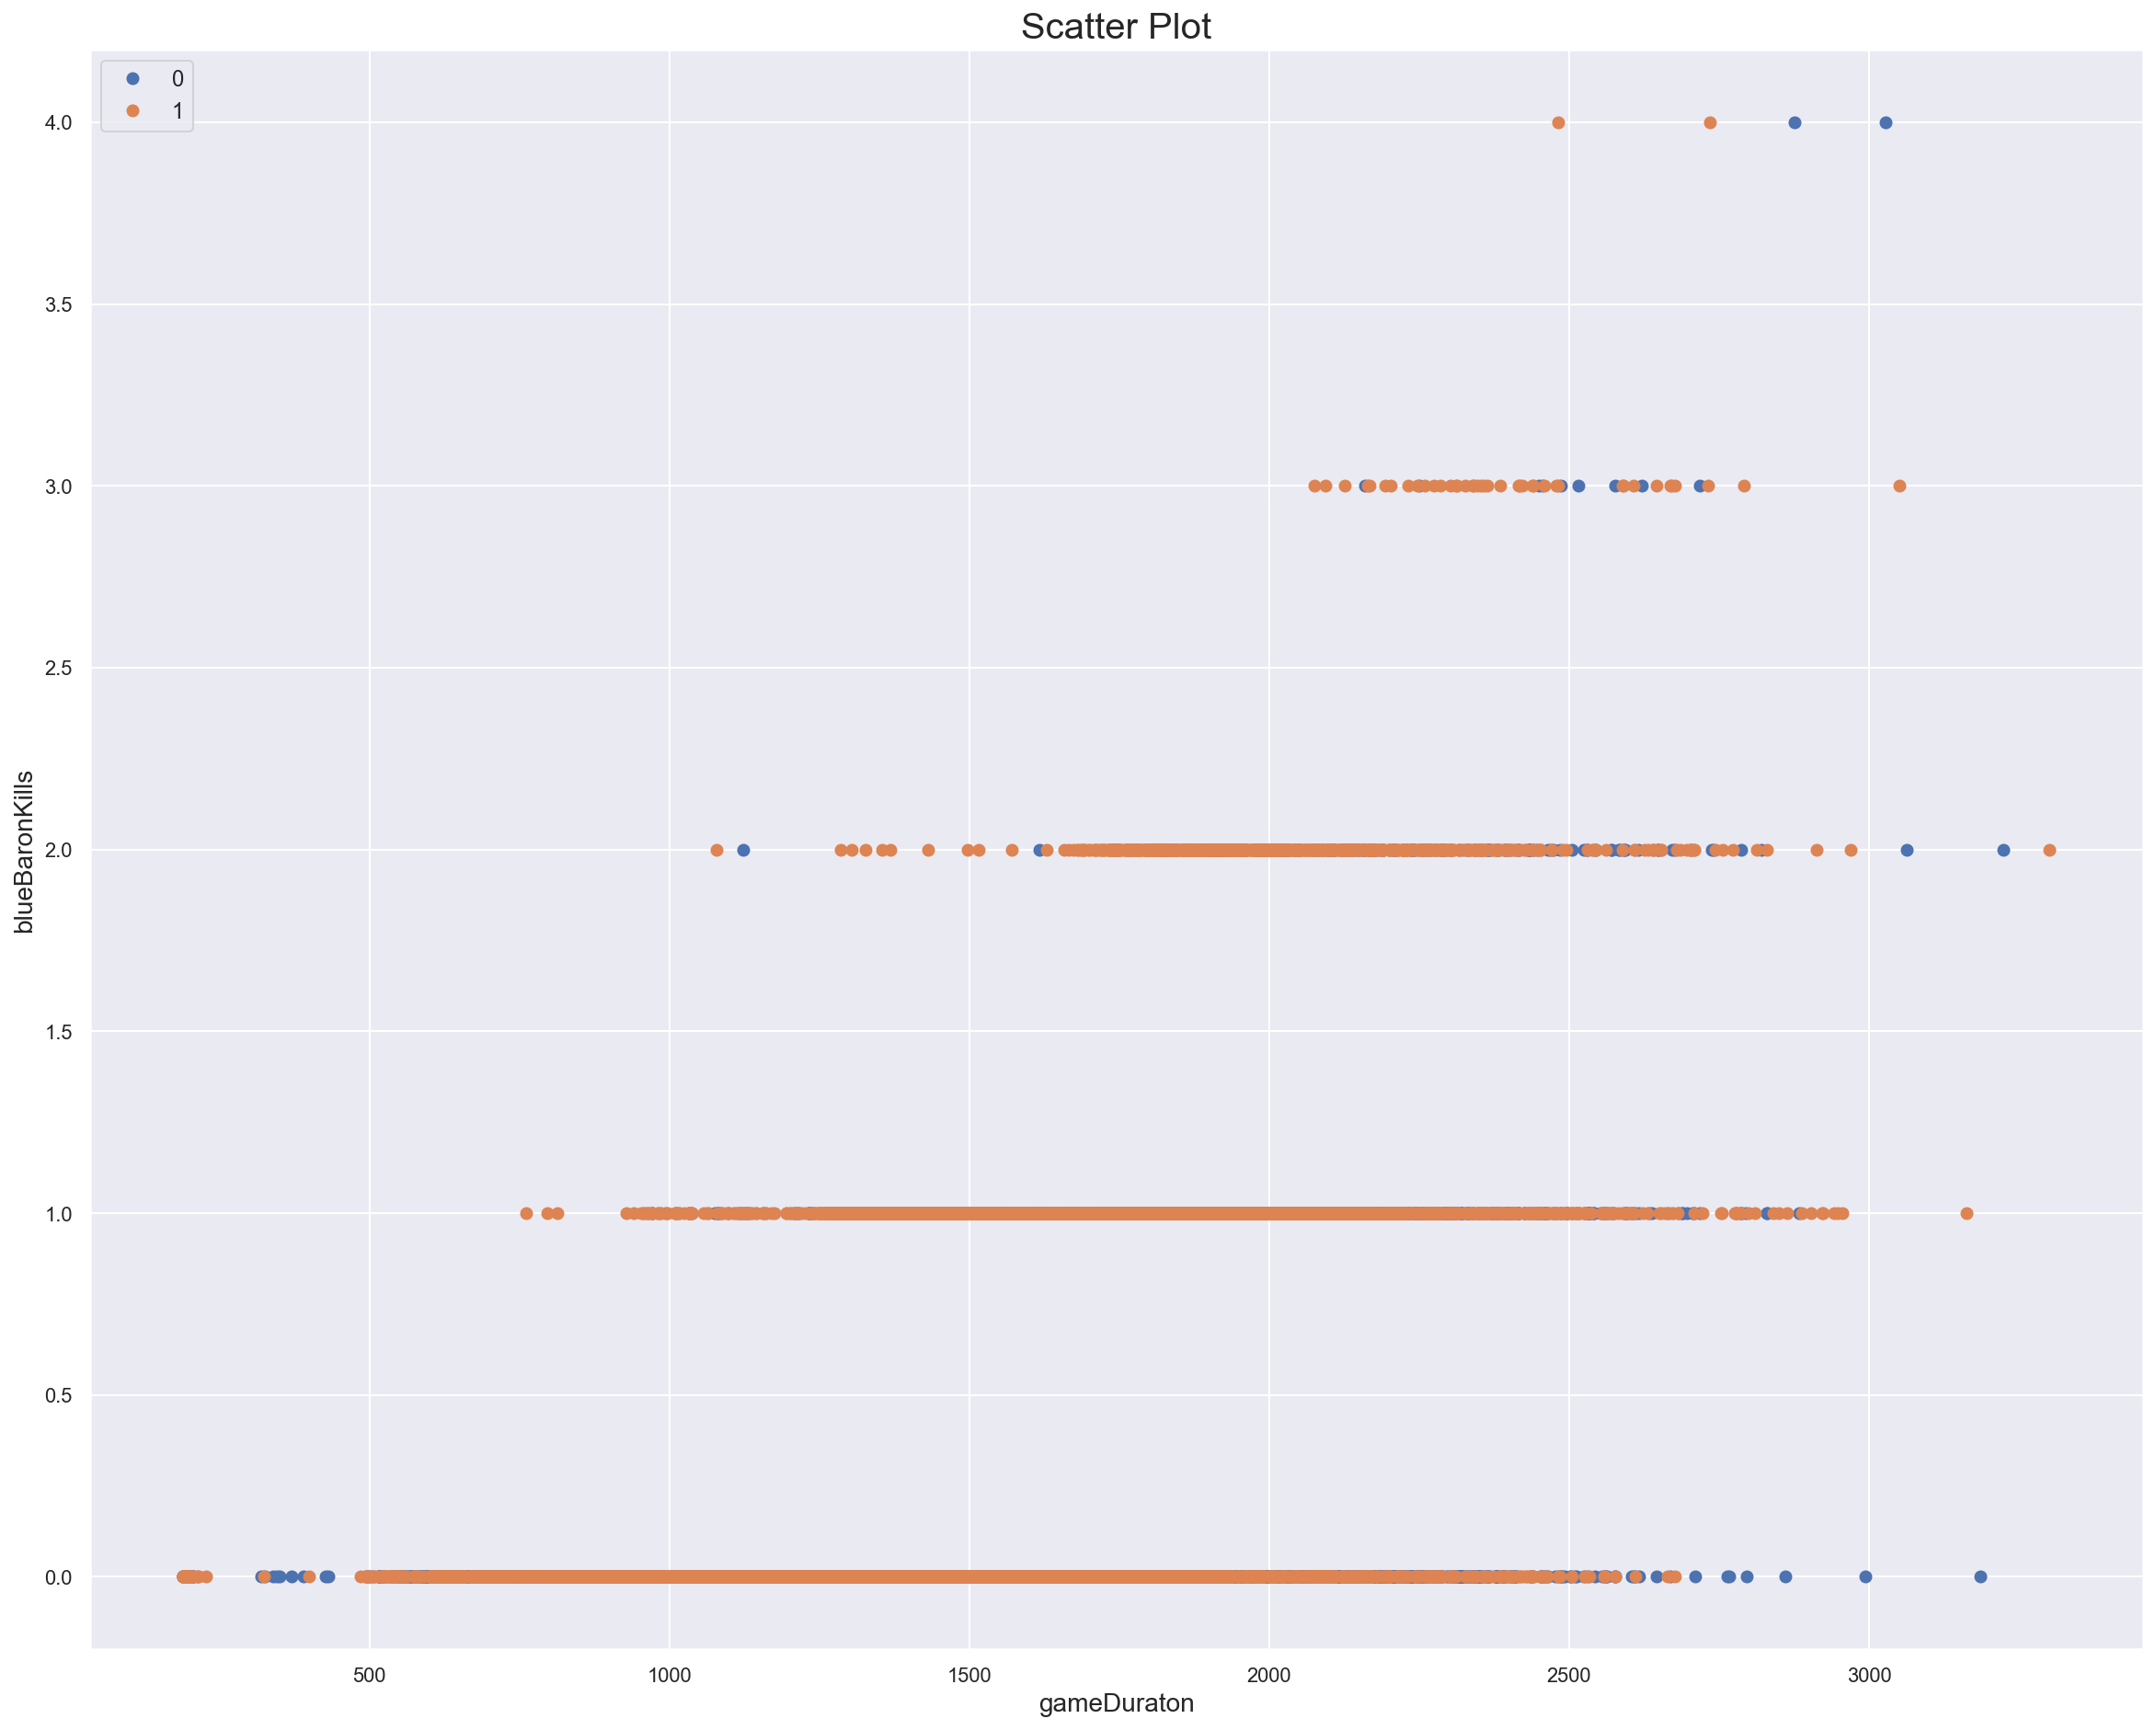

In [174]:
groups = df.groupby('blueWins')


fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.gameDuraton,
            group.blueBaronKills,
            marker='o',
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('gameDuraton', fontsize=14)
plt.ylabel('blueBaronKills', fontsize=14)

plt.show()

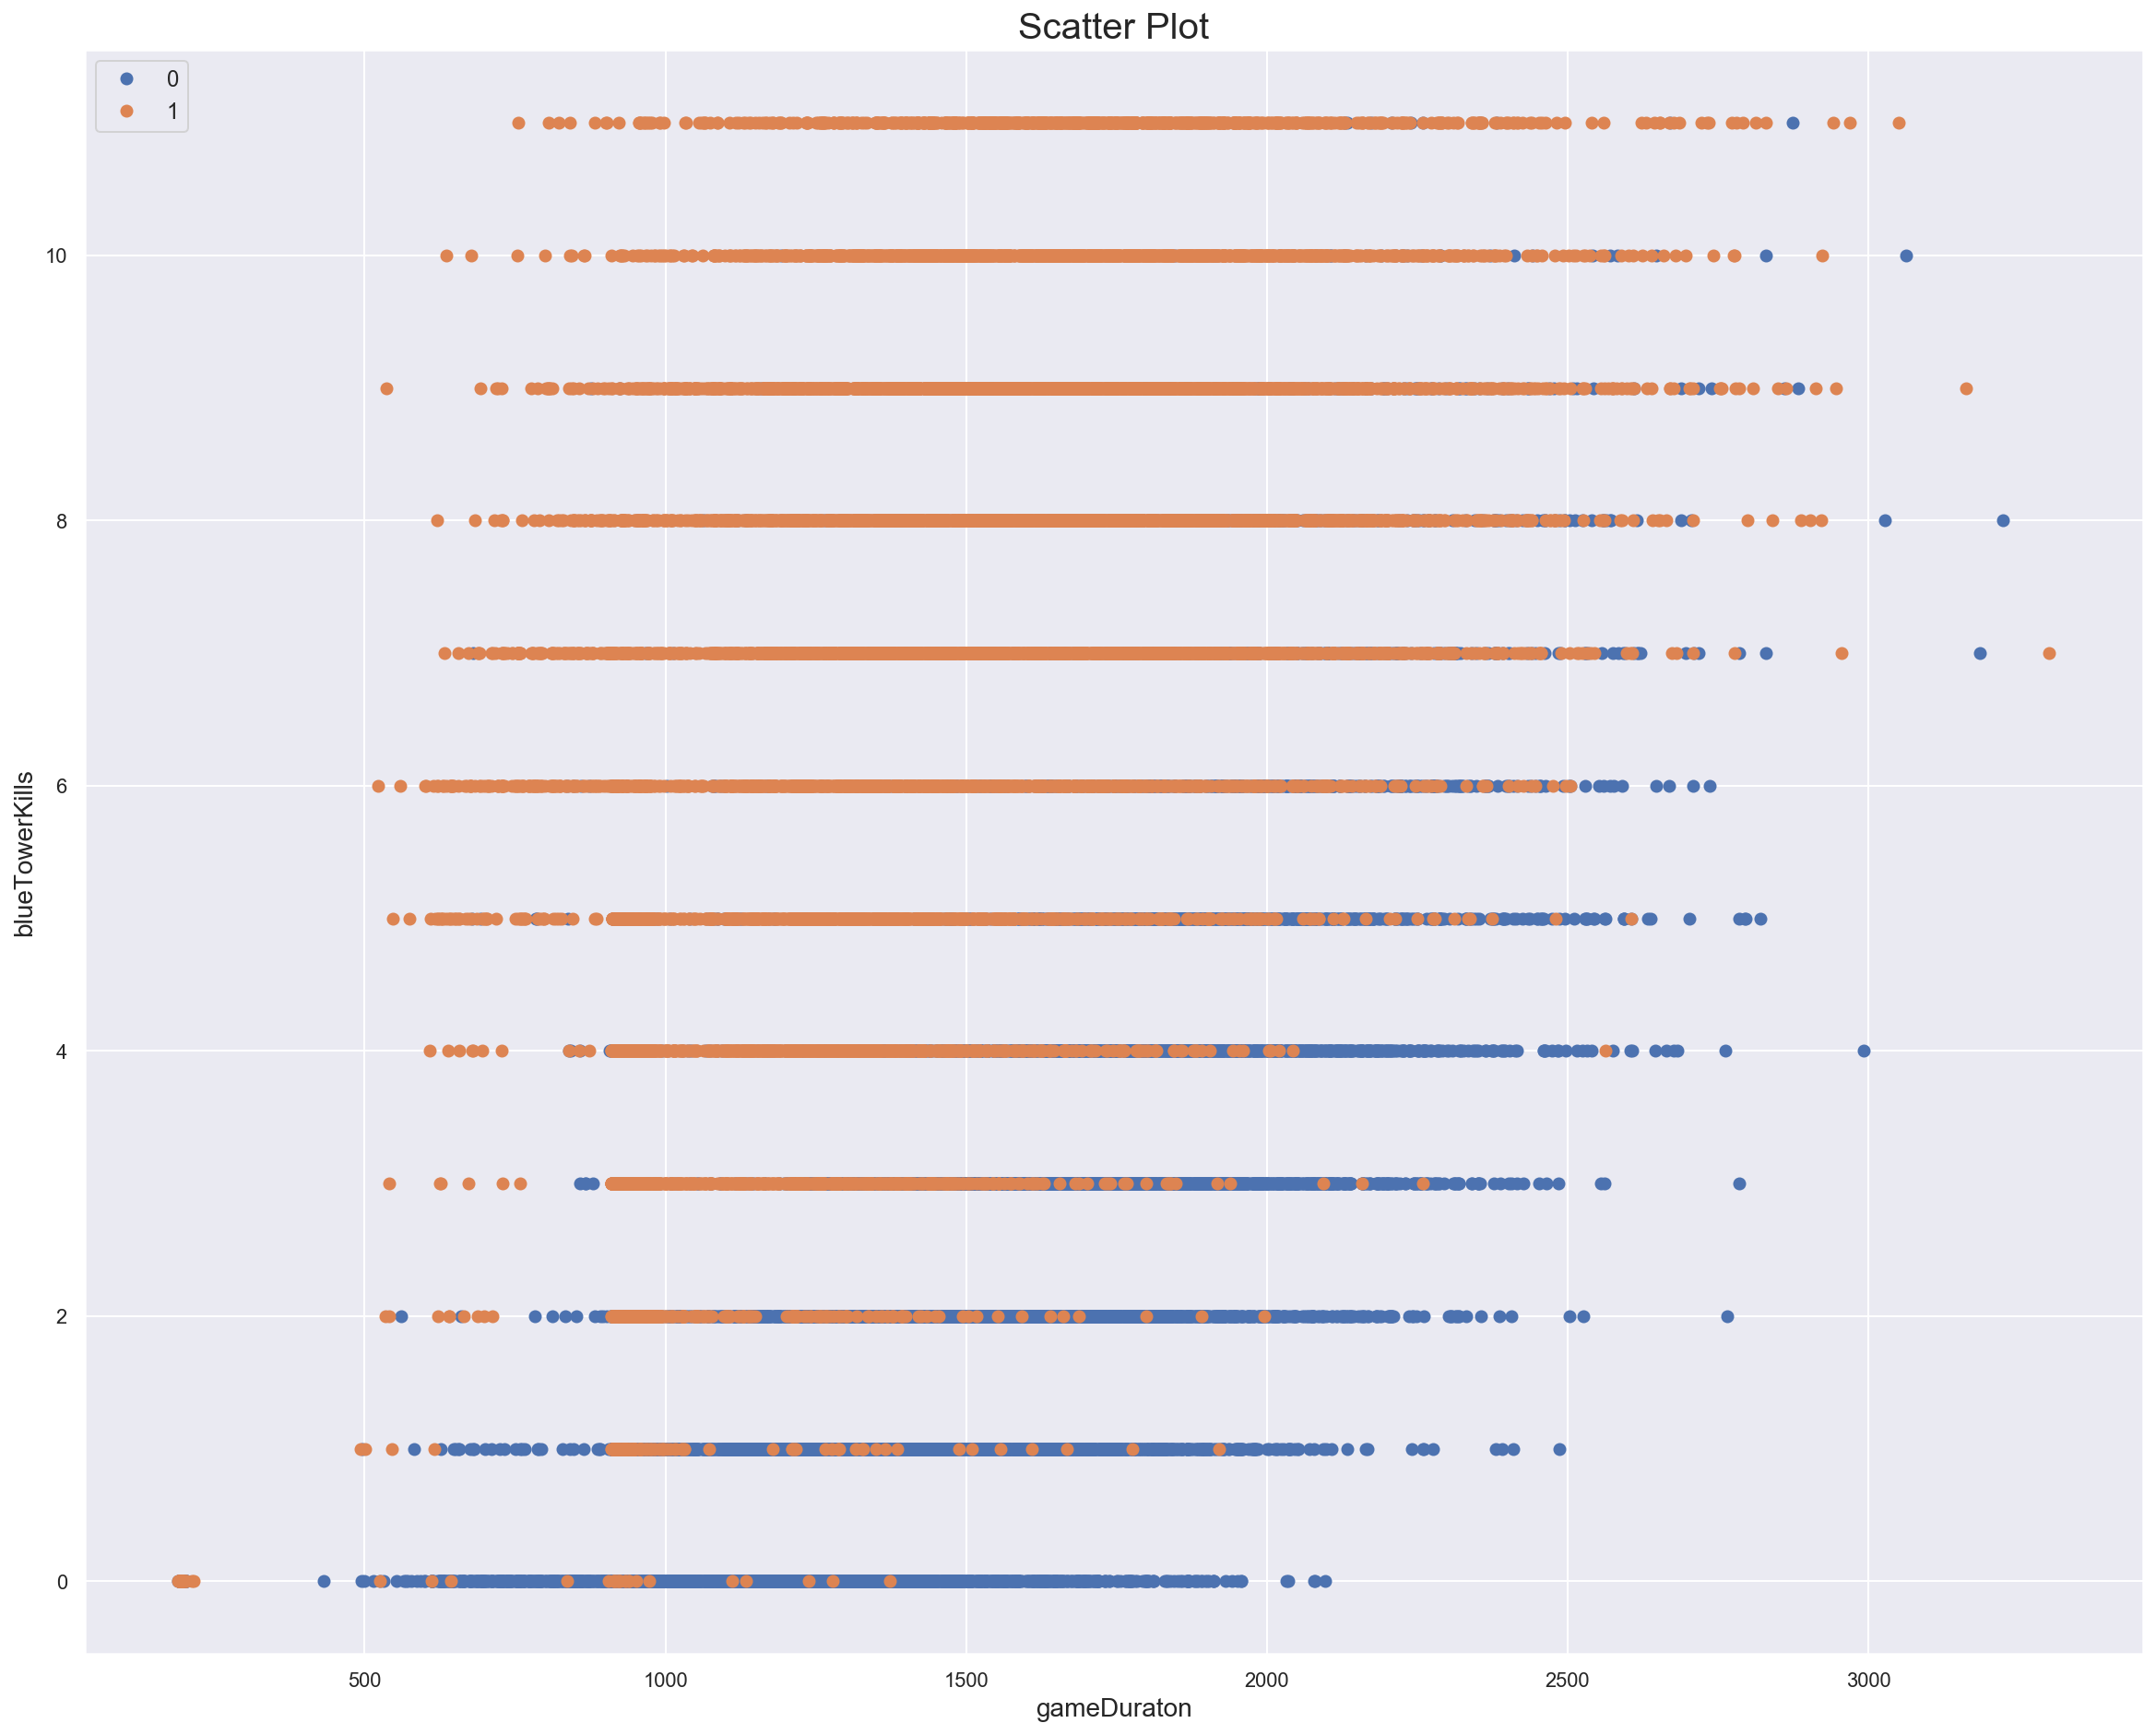

In [175]:
groups = df_r.groupby('blueWins')


fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.gameDuraton,

            group.blueTowerKills,

            marker='o',

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left')  # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('gameDuraton', fontsize=14)

plt.ylabel('blueTowerKills', fontsize=14)

plt.show()

# X. Model Selection
 x-1. Features of Importance
 x_2. best model selection

In [176]:
# X-0. train test split setting

In [177]:
df_c.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueWardPlaced', 'blueKills',
       'blueDeath', 'redWins', 'redWardPlaced', 'redKills', 'redDeath',
       'blueWardKillDiff', 'blueTotalGoldDiff', 'blueTotalMinionKillDiff',
       'FirstTowerDiff', 'HeraldDiff', 'FirstDragonDiff',
       'blueJungleMinionDiff', 'TotalAssistDiff', 'AvgLevelDiff',
       'TowerKillDiff'],
      dtype='object')

In [180]:
X = df_c.drop(['blueWins', 'gameId', 'gameDuraton'], axis=1)
y = df_c['blueWins']

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([9919, 9841]))

In [182]:
feature_name = list(X)
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

blueWardPlaced  blueKills  blueDeath  redWins  redWardPlaced  redKills  \
10165              47         40         20        0             42        19   
8605              110         25         13        0            122        13   
42                 36          4         17        1             48        17   
6356               42         38         20        0             63        19   
3411               39          4         22        1             32        22   

       redDeath  blueWardKillDiff  blueTotalGoldDiff  blueTotalMinionKillDiff  \
10165        41                 5              11177                       23   
8605         25                 4               1845                        9   
42            4                 3              -9953                        8   
6356         38                 4              12066                       -4   
3411          4               -10             -11441                      -49   

       FirstTowerDiff  HeraldDiff  FirstDragonDiff  blueJungleMinionDiff  \
10165               1           1                1                   -31   
8605                1          -1               -1                   -60   
42                 -1           0                1                   -12   
6356                1           1               -1                    19   
3411               -1           0               -1                   -61   

       TotalAssistDiff  AvgLevelDiff  TowerKillDiff  
10165               19           1.2              8  
8605                22           0.6              0  
42                 -22          -1.2             -4  
6356                36           2.0              5  
3411               -16          -1.8             -2

In [183]:
# 트레인 테스트 모델 데이터 갯수 일치한거 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19760, 17), (4940, 17), (19760,), (4940,))

In [184]:
# X-1. features of importance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

In [ ]:
target_col = ['rank_test_score', 'mean_test_score',
              'param_n_estimators', 'param_max_depth']

In [ ]:
cv_results_df[target_col].sort_values('rank_test_score').head()

In [ ]:
grid_cv.best_params_

In [ ]:
grid_cv.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

In [ ]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

In [ ]:
# X-2. Best Model Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=4)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('Scaler', StandardScaler()),
              ('clf', RandomForestClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [{
    'clf__max_depth': [6, 8, 10, 100],
    'clf__n_estimators': [50, 100, 200, 1000]
}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=params,
                          return_train_score=True, cv=5, verbose=2)
gridsearch.fit(X, y)

In [ ]:
score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_train_score',
          'mean_test_score', 'std_test_score']]

In [ ]:
gridsearch.best_estimator_

In [ ]:
pred = gridsearch.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
# 형기님이 만든 모델 성능 테스트

In [ ]:
df_c['Win'], df_c['Kill'], df_c['Death'], df_c['TotalGoldDiff'], df_c['TotalMinionDiff'], df_c['TotalJungleMinionDiff']= df_c['blueWins'], df_c['blueKills'], df_c['blueDeath'],df_c['blueTotalGoldDiff'], df_c['blueTotalMinionKillDiff'], df_c['blueJungleMinionDiff']

In [ ]:
df_c['FirstTower'], df_c['FirstDragon'], df_c['TotalWardsKillDiff'] = df_c['FirstTowerDiff'], df_c['FirstDragonDiff'], df_c['blueWardKillDiff']

In [ ]:
df_c = df_c.drop(columns=[
 'blueWins',
 'blueKills',
 'blueDeath',
 'blueTotalGoldDiff',
 'blueTotalMinionKillDiff',
 'blueJungleMinionDiff',
 'FirstTowerDiff',
 'FirstDragonDiff',
 'blueWardKillDiff'
])

In [ ]:
df_c = df_c[['gameId', 'Win', 'TotalGoldDiff', 'AvgLevelDiff', 'TotalAssistDiff', 'Kill', 'Death',  'TotalMinionDiff', 'TotalJungleMinionDiff', 'FirstTower', 'TowerKillDiff', 'HeraldDiff', 'FirstDragon','TotalWardsKillDiff']]

In [ ]:
df_c.columns, len(df_c.columns)

In [ ]:
df_c.to_csv("df2.csv")